# Titanic Project!

In this project we are trying to predict the death rate of people who were on the Titanic. The data is implemented from Kaggle. This file will contain an explaination of each step in addition to a flow chart that will show the flow of the work.

First import the libraries that will be used in the analysis.


In [125]:
from IPython.display import display, Markdown, display_html
from itertools import chain,cycle

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
cf.go_offline()

import plotly.express as px
from chart_studio import plotly
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objs as go


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
class bcolors:
    PURPLE = '\033[95m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [3]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Import the data and get an initial idea about it.

Import the data after downloading it. The display the head of the dataframe of the training data and the test data, then display the information and the description of the data sets. Finally, check if there are missing points in the two data sets.

In [4]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [6]:
test.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

Both data sets have the same features, except for the test data it doesn't have the target column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

We can see the training data is almost double the size of the test data. We can notice some diffrances in the data provided in both dataframes, such as, 

<ol>
    <li> <b>Age:</b> the maximum ages, in addition to some ages missing in the test data.</li>
    <li> <b>Parch:</b> the maximum number is differnet.</li>
    <li> <b>Fare:</b> the average is slightly different, and the standard deviation is also differnt.</li>
    <li> <b>Embarked:</b> both dataframes have the same top frequent Embarked, which is <b>S</b>. However, the frequancy is differnet as both dataframes have different sizes.</li>
</ol>

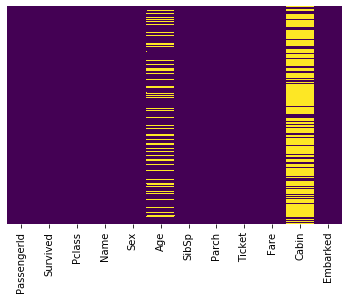

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
# To see where are the missing values exactly
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

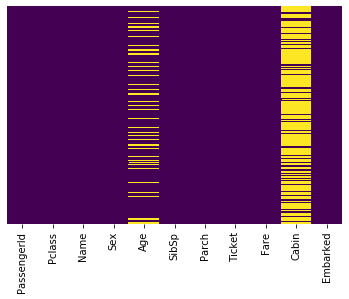

In [13]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
# To see where are the missing values exactly
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since most of the **Cabin** data is missing, we are going to drop it from both dataframes. However, for the **Age**, **Fare**, **Embarked** missing data, we will try to impute it.

## Now we can study the features in greater depth to help us feature engineer it.

To start, we will create some graphs of the features and see how they are realted to each other; this will help us impute the missing data and group it in a way to imporve the results of our models. After each graph we will build a conclusion and we will then summerize all colnclusions before we start feature engineering the data.

In [15]:
# Merge the dataframes together
dset = df.append(test)

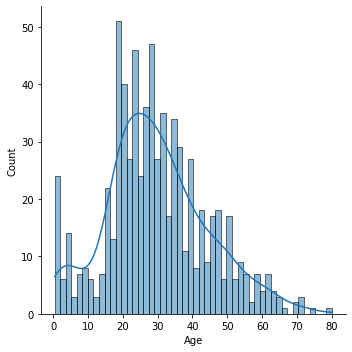

In [16]:
sns.displot(df['Age'], kde=True, bins=50)

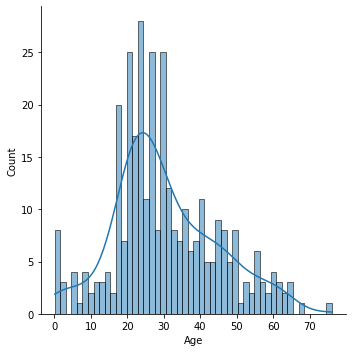

In [17]:
sns.displot(data=test, x='Age', kde=True, bins=50)

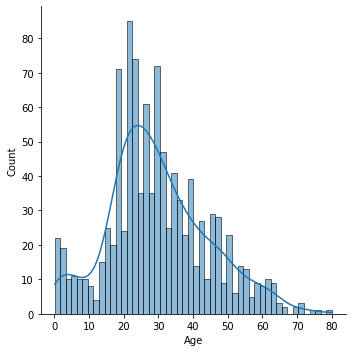

In [18]:
sns.displot(dset['Age'], kde=True, bins=50)

#### Idea #1
In general, the data peaked around age 25-30 years old. There is also a small peak around age 5. Later, we will revisit the ages groups based on the title and the family.

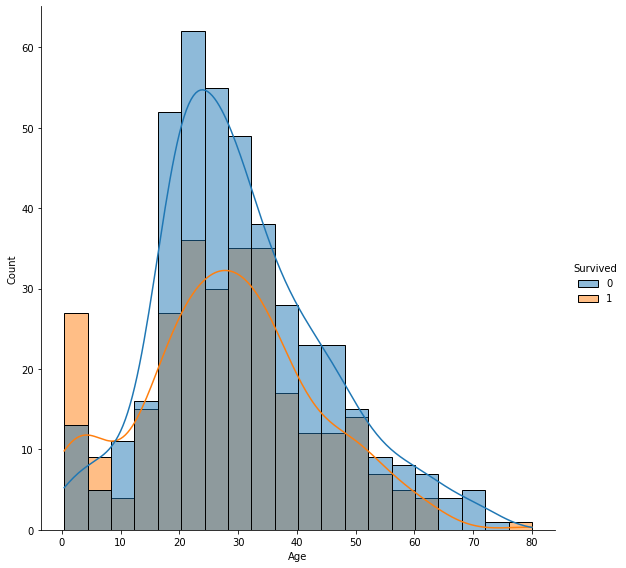

In [19]:
sns.displot(data=df, x='Age', hue='Survived', kde=True, height=8, )

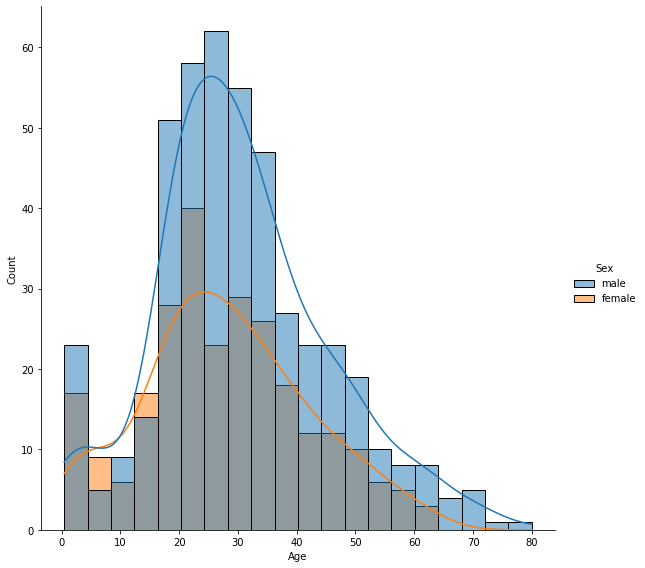

In [20]:
sns.displot(data=df, x='Age', hue='Sex', kde=True, height=8, )

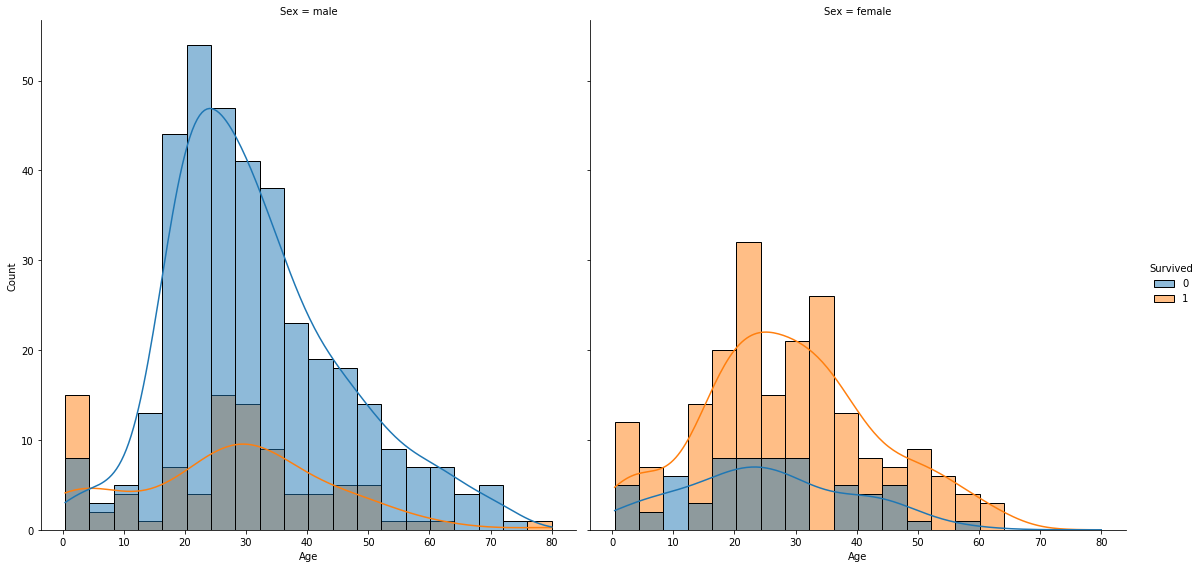

In [21]:
sns.displot(data=df, x='Age', hue='Survived', kde=True, height=8, col='Sex')

#### Idea #2
We can see that younger people, from both genders, tend to survive more, and most death cases were between men. In addition to men spanning over all age groups.

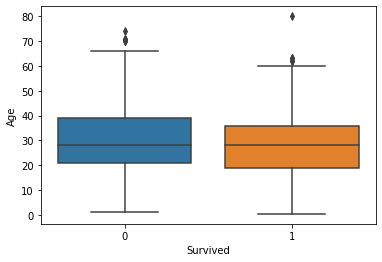

In [22]:
sns.boxplot(x='Survived', y="Age", data=df)

#### Idea #3
From the graph above we can see that passengers are mainly between 20 and 40 years old, and the younger they are the more they tend to survive.

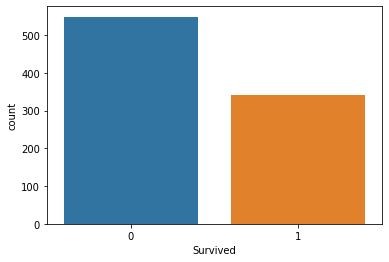

In [23]:
sns.countplot(data=df, x='Survived',)

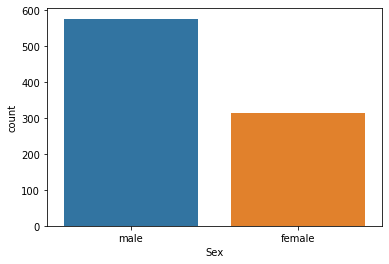

In [24]:
sns.countplot(x=df['Sex'],)

In [25]:
df['Sex'].value_counts(), test['Sex'].value_counts(), dset['Sex'].value_counts()

(male      577
 female    314
 Name: Sex, dtype: int64,
 male      266
 female    152
 Name: Sex, dtype: int64,
 male      843
 female    466
 Name: Sex, dtype: int64)

In [26]:
, test['Sex'].value_counts(sort=True, normalize=True,), dset['Sex'].value_counts(sort=True, normalize=True,)

("test['Sex'].value_counts(sort=True,",
 'normalize=True,),',
 "dset['Sex'].value_counts(sort=True,",
 'normalize=True,)')

In [27]:
display(Markdown("### Summary of the graphs above"))

display(Markdown("#### The training data:"))
print('Number of people who died:', df['Survived'].value_counts()[0], f"({df['Survived'].value_counts(sort=True, normalize=True,)[0]:.2f}%)")
print('Number of people who survived:', df['Survived'].value_counts()[1], f"({df['Survived'].value_counts(sort=True, normalize=True,)[1]:.2f}%)")
print('Males count:', df['Sex'].value_counts()['male'], f"({df['Sex'].value_counts(sort=True, normalize=True,)['male']:.2f}%)")
print('Females count:', df['Sex'].value_counts()['female'], f"({df['Sex'].value_counts(sort=True, normalize=True,)['female']:.2f}%)")

display(Markdown("#### The test data:"))
print('Males count:', test['Sex'].value_counts()['male'], f"({test['Sex'].value_counts(sort=True, normalize=True,)['male']:.2f}%)")
print('Females count:', test['Sex'].value_counts()['female'], f"({test['Sex'].value_counts(sort=True, normalize=True,)['female']:.2f}%)")

display(Markdown("#### The whole data:"))
print('Males count:', dset['Sex'].value_counts()['male'], f"({dset['Sex'].value_counts(sort=True, normalize=True,)['male']:.2f}%)")
print('Females count:', dset['Sex'].value_counts()['female'], f"({dset['Sex'].value_counts(sort=True, normalize=True,)['female']:.2f}%)")

### Summary of the graphs above

#### The training data:

Number of people who died: 549 (0.62%)
Number of people who survived: 342 (0.38%)
Males count: 577 (0.65%)
Females count: 314 (0.35%)


#### The test data:

Males count: 266 (0.64%)
Females count: 152 (0.36%)


#### The whole data:

Males count: 843 (0.64%)
Females count: 466 (0.36%)


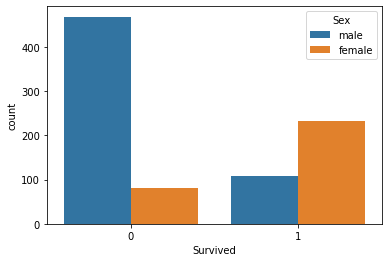

In [28]:
# plt.figure(figsize=(10,6), dpi=80)
sns.countplot(x='Survived',hue='Sex', data=df,)

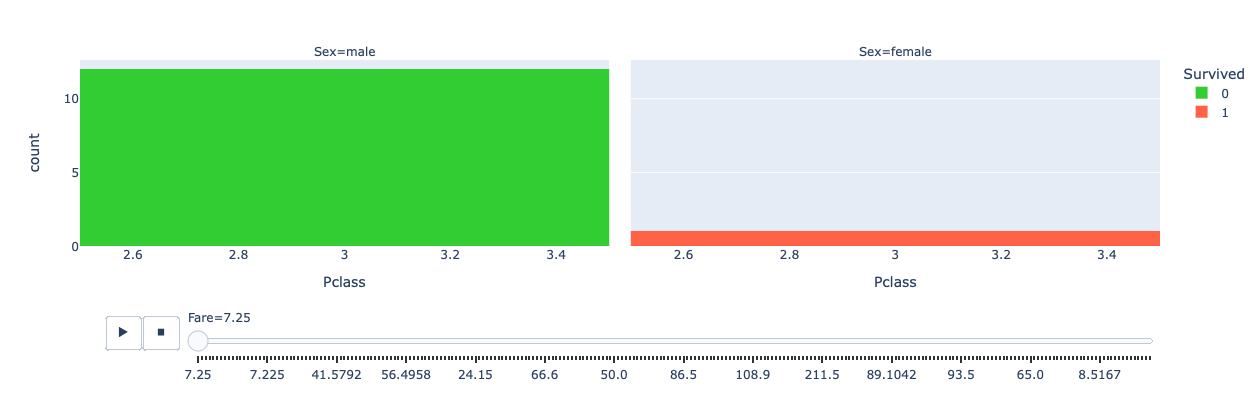

In [29]:
px.histogram(data_frame=df, x='Pclass', color='Survived', facet_col='Sex',
             animation_frame='Fare',
             color_discrete_sequence=["limegreen","tomato"]).update_layout(autosize=False,width=600,height=400,)

#### Idea #4
Based on the graphs above we conclud the existance of a huge correlation between the gender of the passengers and their survival. Also, the number of male passengers is higher in the train and test dataframes. Also, there are more males than females onboard, which supports **Idea #2**.

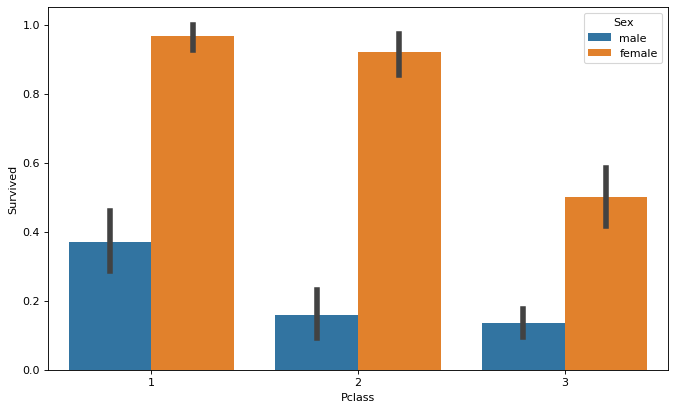

In [30]:
plt.figure(figsize=(10,6), dpi=80)
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', errwidth=5, )

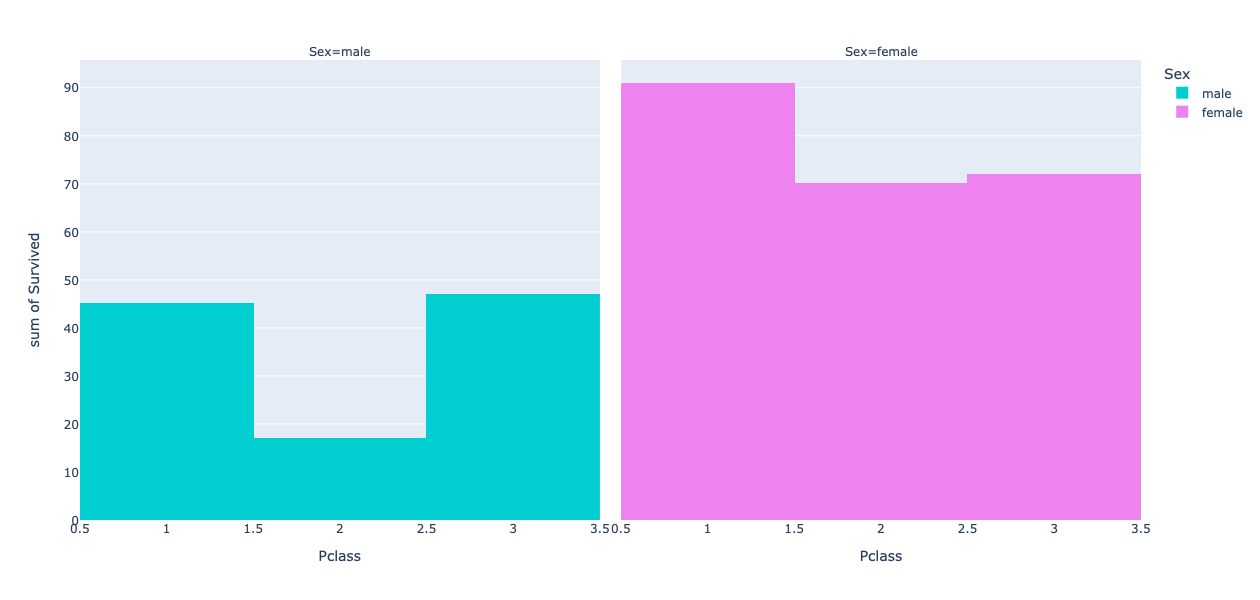

In [31]:
px.histogram(data_frame=df, x='Pclass', y='Survived',facet_col='Sex', color='Sex',
       color_discrete_map={'male':'darkturquoise', 'female':'violet'} ).update_layout(autosize=False,width=800,height=600,)

In [32]:
display(Markdown("### Survival Summury Based on Class:"))

display(Markdown("#### First Class:"))
print("Number of people on the first class who survived:   ", df[df['Pclass']==1]['Survived'].value_counts()[1], f"({df[df['Pclass']==1]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("Number of people on the first class who died:       ", df[df['Pclass']==1]['Survived'].value_counts()[0], f" ({df[df['Pclass']==1]['Survived'].value_counts(normalize=True)[0]:.2f}%)")
print('---------------------------------------------------------------------------------')
print("The number of passengers who survived in the 1st class (female) is:  ", df[(df['Pclass']==1) & (df['Sex']=='female')]['Survived'].value_counts()[1], f"   ({df[(df['Pclass']==1) & (df['Sex']=='female')]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("The number of passengers who died in the 1st class (female) is:      ", df[(df['Pclass']==1) & (df['Sex']=='female')]['Survived'].value_counts()[0], f"    ({df[(df['Pclass']==1) & (df['Sex']=='female')]['Survived'].value_counts(normalize=True)[0]:.2f}%)")
print("The number of passengers who survived in the 1st class (male) is:    ", df[(df['Pclass']==1) & (df['Sex']=='male')]['Survived'].value_counts()[1], f"   ({df[(df['Pclass']==1) & (df['Sex']=='male')]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("The number of passengers who died in the 1st class (male) is:        ", df[(df['Pclass']==1) & (df['Sex']=='male')]['Survived'].value_counts()[0], f"   ({df[(df['Pclass']==1) & (df['Sex']=='male')]['Survived'].value_counts(normalize=True)[0]:.2f}%)")

print('\n')

display(Markdown("#### Second Class:"))
print("Number of people on the second class who survived:   ", df[df['Pclass']==2]['Survived'].value_counts()[1], f" ({df[df['Pclass']==2]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("Number of people on the second class who died:       ", df[df['Pclass']==2]['Survived'].value_counts()[0], f" ({df[df['Pclass']==2]['Survived'].value_counts(normalize=True)[0]:.2f}%)")
print('---------------------------------------------------------------------------------')
print("The number of passengers who survived in the 2nd class (female) is:  ", df[(df['Pclass']==2) & (df['Sex']=='female')]['Survived'].value_counts()[1], f"   ({df[(df['Pclass']==2) & (df['Sex']=='female')]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("The number of passengers who died in the 2nd class (female) is:      ", df[(df['Pclass']==2) & (df['Sex']=='female')]['Survived'].value_counts()[0], f"    ({df[(df['Pclass']==2) & (df['Sex']=='female')]['Survived'].value_counts(normalize=True)[0]:.2f}%)")
print("The number of passengers who survived in the 2nd class (male) is:    ", df[(df['Pclass']==2) & (df['Sex']=='male')]['Survived'].value_counts()[1], f"   ({df[(df['Pclass']==2) & (df['Sex']=='male')]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("The number of passengers who died in the 2nd class (male) is:        ", df[(df['Pclass']==2) & (df['Sex']=='male')]['Survived'].value_counts()[0], f"   ({df[(df['Pclass']==2) & (df['Sex']=='male')]['Survived'].value_counts(normalize=True)[0]:.2f}%)")

print('\n')

display(Markdown("#### Third Class:"))
print("Number of people on the third class who survived:   ", df[df['Pclass']==3]['Survived'].value_counts()[1], f"({df[df['Pclass']==3]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("Number of people on the third class who died:       ", df[df['Pclass']==3]['Survived'].value_counts()[0], f"({df[df['Pclass']==3]['Survived'].value_counts(normalize=True)[0]:.2f}%)")
print('---------------------------------------------------------------------------------')
print("The number of passengers who survived in the 3rd class (female) is:  ", df[(df['Pclass']==3) & (df['Sex']=='female')]['Survived'].value_counts()[1], f"    ({df[(df['Pclass']==3) & (df['Sex']=='female')]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("The number of passengers who died in the 3rd class (female) is:      ", df[(df['Pclass']==3) & (df['Sex']=='female')]['Survived'].value_counts()[0], f"    ({df[(df['Pclass']==3) & (df['Sex']=='female')]['Survived'].value_counts(normalize=True)[0]:.2f}%)")
print("The number of passengers who survived in the 3rd class (male) is:    ", df[(df['Pclass']==3) & (df['Sex']=='male')]['Survived'].value_counts()[1], f"    ({df[(df['Pclass']==3) & (df['Sex']=='male')]['Survived'].value_counts(normalize=True)[1]:.2f}%)")
print("The number of passengers who died in the 3rd class (male) is:        ", df[(df['Pclass']==3) & (df['Sex']=='male')]['Survived'].value_counts()[0], f"   ({df[(df['Pclass']==3) & (df['Sex']=='male')]['Survived'].value_counts(normalize=True)[0]:.2f}%)")

### Survival Summury Based on Class:

#### First Class:

Number of people on the first class who survived:    136 (0.63%)
Number of people on the first class who died:        80  (0.37%)
---------------------------------------------------------------------------------
The number of passengers who survived in the 1st class (female) is:   91    (0.97%)
The number of passengers who died in the 1st class (female) is:       3     (0.03%)
The number of passengers who survived in the 1st class (male) is:     45    (0.37%)
The number of passengers who died in the 1st class (male) is:         77    (0.63%)




#### Second Class:

Number of people on the second class who survived:    87  (0.47%)
Number of people on the second class who died:        97  (0.53%)
---------------------------------------------------------------------------------
The number of passengers who survived in the 2nd class (female) is:   70    (0.92%)
The number of passengers who died in the 2nd class (female) is:       6     (0.08%)
The number of passengers who survived in the 2nd class (male) is:     17    (0.16%)
The number of passengers who died in the 2nd class (male) is:         91    (0.84%)




#### Third Class:

Number of people on the third class who survived:    119 (0.24%)
Number of people on the third class who died:        372 (0.76%)
---------------------------------------------------------------------------------
The number of passengers who survived in the 3rd class (female) is:   72     (0.50%)
The number of passengers who died in the 3rd class (female) is:       72     (0.50%)
The number of passengers who survived in the 3rd class (male) is:     47     (0.14%)
The number of passengers who died in the 3rd class (male) is:         300    (0.86%)


#### Idea #5
Apperently, the passenger class played an important role in survival rate, that is, the height the class the more the passanger has a chance to survive.

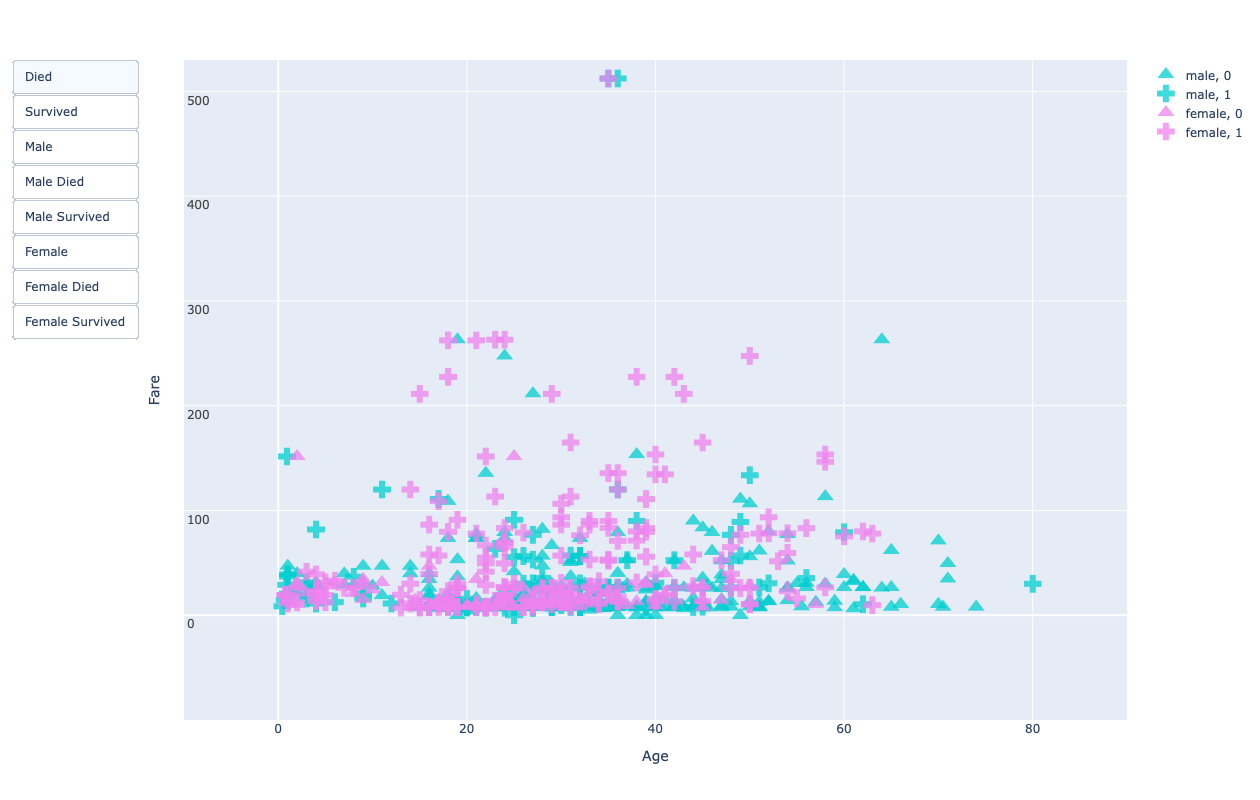

In [33]:
button_layer_1_height = 1.12

fig = px.scatter(data_frame=df, x='Age', y='Fare', color='Sex', color_discrete_map={'male':'darkturquoise', 'female':'violet'}, 
           symbol='Survived', symbol_sequence=['triangle-up-dot', 'cross'],opacity=0.75, height=500,
            range_y=(-100,530), range_x=(-10, 90), hover_name='Name', hover_data=['SibSp', 'Parch']
          ).update_traces(marker={'size': 15})

updatemenus=[dict(type = "buttons", direction = "up",
             buttons=list([
             dict(args=[{'visible': [True , False , True  , False ]} ,],
                  label = "Died", method="update"),
             dict(args=[{'visible': [False , True , False  , True  ]} ,],
                  label = "Survived", method="update"),                 
                 
             dict(args=[{'visible': [True  , True  , False , False ]} ,],
                  label = "Male"   , method="update"),
             dict(args=[{'visible': [True  , False  , False , False ]} ,],
                  label = "Male Died"   , method="update"),
             dict(args=[{'visible': [False  , True  , False , False ]} ,],
                  label = "Male Survived"   , method="update"),
                 
             dict(args=[{'visible': [False , False , True  , True  ]} ,],
                  label = "Female", method="update"),
             dict(args=[{'visible': [False , False , True  , False  ]} ,],
                  label = "Female Died", method="update"),
             dict(args=[{'visible': [False , False , False  , True  ]} ,],
                  label = "Female Survived", method="update"),
                 
             ])),]


fig.update_yaxes(ticklabelposition="inside bottom", overwrite=True)
fig.update_layout(updatemenus=updatemenus,legend_title_text='', autosize=False, width=1200, height=800)
# fig.write_html('titanic2.html')

#### Idea #6
The fares that are higher than 300 could cause an issue when feeding the data into the model, thus, we shall drop all the points with **Fare>300**. <font color='red'>Note: we can change this condition to exclude any fare above 160 and see if we get better results.</font>

#### Idea #7
**Age>70** is a little bit exaggerated, so we can drop it and see what will happen.

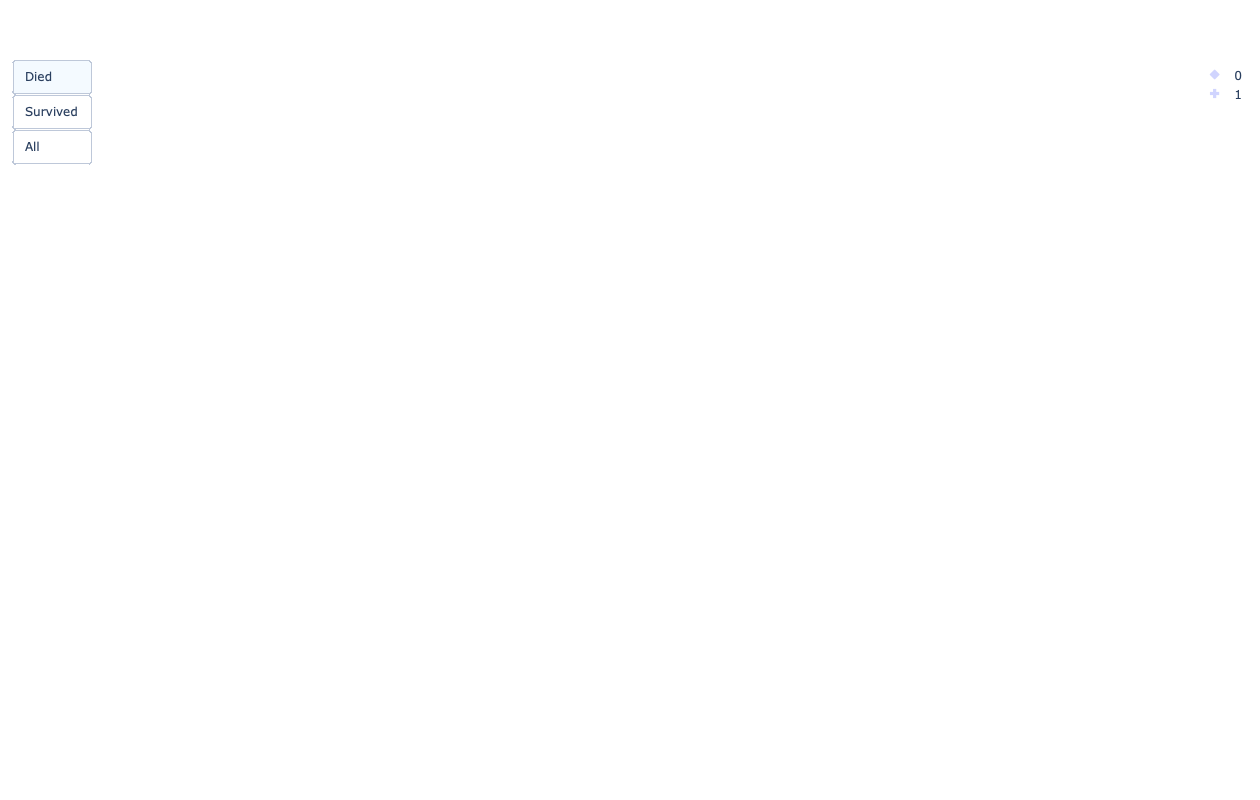

In [34]:
fig = px.scatter_3d(data_frame=df, x='Age', y='SibSp', z='Fare', opacity=0.3,
                    symbol='Survived', symbol_sequence=['diamond', 'cross'],
                   range_y=(-1,10))

updatemenus=[dict(type = "buttons", direction = "up",
             buttons=list([
             dict(args=[{'visible': [True , False]} ,],
                  label = "Died", method="update"),
             dict(args=[{'visible': [False , True]} ,],
                  label = "Survived", method="update"),  
             dict(args=[{'visible': [True , True]} ,],
                  label = "All", method="update"),                 
             ])),]


fig.update_yaxes(ticklabelposition="inside bottom", overwrite=True)
fig.update_layout(updatemenus=updatemenus,legend_title_text='', autosize=False,width=800,height=800,)
# fig.write_html('titanic1.html')

In [35]:
data_SibSp = [df[(df['SibSp']==0)]['Survived'].value_counts(ascending=True),
        df[(df['SibSp']==1)]['Survived'].value_counts(ascending=False),
       df[(df['SibSp']==2)]['Survived'].value_counts(ascending=False),
       df[(df['SibSp']==3)]['Survived'].value_counts(ascending=False),
       df[(df['SibSp']==4)]['Survived'].value_counts(ascending=False),
       df[(df['SibSp']==5)]['Survived'].value_counts(ascending=False),
       df[(df['SibSp']==6)]['Survived'].value_counts(ascending=False),
       df[(df['SibSp']==7)]['Survived'].value_counts(ascending=False),
       df[(df['SibSp']==8)]['Survived'].value_counts(ascending=False)]
d_SibSp = pd.DataFrame(data=data_SibSp, index=['SibSp = 0', 'SipSp = 1', 'SipSp = 2', 'SipSp = 3', 'SipSp = 4', 'SipSp = 5', 'SipSp = 6', 'SipSp = 7', 'SipSp = 8'],  )
d_SibSp['Survived'] = d_SibSp[1]
d_SibSp['Died'] = d_SibSp[0]
d_SibSp['Total'] = d_SibSp[1]+d_SibSp[0]
d_SibSp.drop([0,1], axis=1, inplace=True)

SibSp = 0  SipSp = 1  SipSp = 2  SipSp = 3  SipSp = 4  SipSp = 5  \
Survived      210.0      112.0       13.0        4.0        3.0        NaN   
Died          398.0       97.0       15.0       12.0       15.0        5.0   
Total         608.0      209.0       28.0       16.0       18.0        NaN   

          SipSp = 6  SipSp = 7  SipSp = 8  
Survived        NaN        NaN        NaN  
Died            NaN        NaN        7.0  
Total           NaN        NaN        NaN

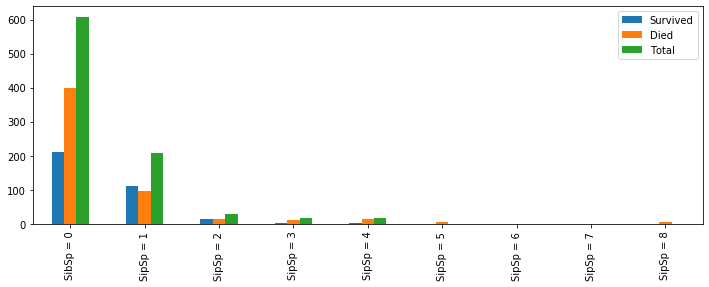

In [36]:
display(d_SibSp.T)
d_SibSp.plot(kind='bar', figsize=(12,4))
plt.show()

#### Idea #8
It looks like most passengers were either traveling alone or with once spouse/sibling. Also, people whom where travelling with one person are more likely to survive. On the other hand, it will be hard to form any assumption about those who were travelling with more than one person as there are not enough data point to form one.

Based on that, we can create a new feature and call it **Alone** where we will group the passengeres who are traveling with someone under the same the group and those who are travelling alone will be under another group. But first, let's see what kind of information is in the feature **Parch**

In [37]:
def get_index():
    l = []
    data_Parch = []
    for i in df['Parch'].value_counts().index:
        l.append(f"Parch={i}")
        data_Parch.append(df[df['Parch']==i]['Survived'].value_counts())
    return l, data_Parch

d_Parch = pd.DataFrame(data=get_index()[1],index=get_index()[0])
d_Parch.fillna(0, inplace=True)
d_Parch['Survived'] = d_Parch[1]
d_Parch['Died'] = d_Parch[0]
d_Parch['Total'] = d_Parch[0] + d_Parch[1]
d_Parch.drop([0,1], axis=1, inplace=True)

Survived   Died  Total
Parch=0     233.0  445.0  678.0
Parch=1      65.0   53.0  118.0
Parch=2      40.0   40.0   80.0
Parch=5       1.0    4.0    5.0
Parch=3       3.0    2.0    5.0
Parch=4       0.0    4.0    4.0
Parch=6       0.0    1.0    1.0

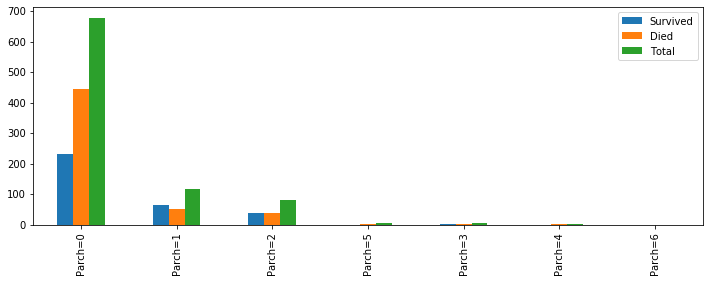

In [38]:
display(d_Parch)
d_Parch.plot(kind='bar', figsize=(12,4))
plt.show()

#### Idea #9
Based on the graph above we can form a similar conclusion as in Idea #8, and thus we can create a new feature called **Family** to count the number of people each passenger is travelling with. Note also that we will create the new features **Family** and **Alone** after we merge both **Parch** and **SibSp** by adding them.

In [39]:
d1 = pd.DataFrame(df['Ticket'].value_counts())

In [40]:
df['Ticket'].value_counts(ascending=False).head(10)

1601            7
CA. 2343        7
347082          7
3101295         6
347088          6
CA 2144         6
382652          5
S.O.C. 14879    5
17421           4
113781          4
Name: Ticket, dtype: int64

In [41]:


df1_styler = d1[d1['Ticket']==2][:10].style.set_table_attributes("style='display:inline'").set_caption('The repeated tickets:')
df2_styler = d1[d1['Ticket']==3][:10].style.set_table_attributes("style='display:inline'").set_caption('(notice the code for 2&3)')
df3_styler = d1[d1['Ticket']==4].style.set_table_attributes("style='display:inline'").set_caption('')
df4_styler = d1[d1['Ticket']==5].style.set_table_attributes("style='display:inline'").set_caption('')
df5_styler = d1[d1['Ticket']==6].style.set_table_attributes("style='display:inline'").set_caption('')
df6_styler = d1[d1['Ticket']==7].style.set_table_attributes("style='display:inline'").set_caption('')


# df2_t_styler = d1[d1['Ticket']==3].T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_()+df6_styler._repr_html_(), raw=True)
# display_html(df1_styler._repr_html_()+df2_styler._repr_html_() +df2_t_styler._repr_html_(), raw=True)

The repeated tickets: Ticket 
 
 250649 
 2 
 
 
 231919 
 2 
 
 
 370365 
 2 
 
 
 16966 
 2 
 
 
 31027 
 2 
 
 
 345764 
 2 
 
 
 PC 17477 
 2 
 
 
 P/PP 3381 
 2 
 
 
 113806 
 2 
 
 
 19996 
 2 
 
 (notice the code for 2&3) Ticket 
 
 239853 
 3 
 
 
 F.C.C. 13529 
 3 
 
 
 PC 17572 
 3 
 
 
 13502 
 3 
 
 
 110413 
 3 
 
 
 371110 
 3 
 
 
 345773 
 3 
 
 
 363291 
 3 
 
 
 SC/Paris 2123 
 3 
 
 
 C.A. 34651 
 3 
 
 Ticket 
 
 17421 
 4 
 
 
 113781 
 4 
 
 
 4133 
 4 
 
 
 LINE 
 4 
 
 
 349909 
 4 
 
 
 19950 
 4 
 
 
 113760 
 4 
 
 
 W./C. 6608 
 4 
 
 
 2666 
 4 
 
 
 PC 17757 
 4 
 
 
 347077 
 4 
 
 Ticket 
 
 382652 
 5 
 
 
 S.O.C. 14879 
 5 
 
 Ticket 
 
 3101295 
 6 
 
 
 347088 
 6 
 
 
 CA 2144 
 6 
 
 Ticket 
 
 1601 
 7 
 
 
 CA. 2343 
 7 
 
 
 347082 
 7

In [42]:
d2 = d1[d1['Ticket']>1]

In [43]:
d2

Ticket
1601           7
CA. 2343       7
347082         7
3101295        6
347088         6
...          ...
19943          2
237736         2
367230         2
36928          2
2627           2

[134 rows x 1 columns]

In [44]:
display(df[df['Ticket']=='230080'])
display(df[df['Ticket']=='36947'])
display(df[df['Ticket']=='347082'])
display(df[df['Ticket']=='363291'])

PassengerId  Survived  Pclass                                      Name  \
148          149         0       2  Navratil, Mr. Michel ("Louis M Hoffman")   
193          194         1       2                Navratil, Master. Michel M   
340          341         1       2            Navratil, Master. Edmond Roger   

      Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
148  male  36.5      0      2  230080  26.0    F2        S  
193  male   3.0      1      1  230080  26.0    F2        S  
340  male   2.0      1      1  230080  26.0    F2        S

PassengerId  Survived  Pclass  \
496          497         1       1   
591          592         1       1   

                                                Name     Sex   Age  SibSp  \
496                   Eustis, Miss. Elizabeth Mussey  female  54.0      1   
591  Stephenson, Mrs. Walter Bertram (Martha Eustis)  female  52.0      1   

     Parch Ticket     Fare Cabin Embarked  
496      0  36947  78.2667   D20        C  
591      0  36947  78.2667   D20        C

PassengerId  Survived  Pclass  \
13            14         0       3   
119          120         0       3   
541          542         0       3   
542          543         0       3   
610          611         0       3   
813          814         0       3   
850          851         0       3   

                                                  Name     Sex   Age  SibSp  \
13                         Andersson, Mr. Anders Johan    male  39.0      1   
119                  Andersson, Miss. Ellis Anna Maria  female   2.0      4   
541               Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0      1   
813                 Andersson, Miss. Ebba Iris Alfrida  female   6.0      4   
850            Andersson, Master. Sigvard Harald Elias    male   4.0      4   

     Parch  Ticket    Fare Cabin Embarked  
13       5  347082  31.275   NaN        S  
119      2  347082  31.275   NaN        S  
541      2  347082  31.275   NaN        S  
542      2  347082  31.275   NaN        S  
610      5  347082  31.275   NaN        S  
813      2  347082  31.275   NaN        S  
850      2  347082  31.275   NaN        S

PassengerId  Survived  Pclass  \
165          166         1       3   
328          329         1       3   
548          549         0       3   

                                                Name     Sex   Age  SibSp  \
165  Goldsmith, Master. Frank John William "Frankie"    male   9.0      0   
328   Goldsmith, Mrs. Frank John (Emily Alice Brown)  female  31.0      1   
548                        Goldsmith, Mr. Frank John    male  33.0      1   

     Parch  Ticket    Fare Cabin Embarked  
165      2  363291  20.525   NaN        S  
328      1  363291  20.525   NaN        S  
548      1  363291  20.525   NaN        S

#### Idea #10
Although it is hard to form a conclusion, we can see that there is a correlation between people who have the same ticket; some were travelling in the same cabine, others had the same last name. The only thing we can use the ticket for is to fill in the **Cabine** missing data, were we assume people who have the same ticket are in the same cabine. Thus, we will match the cabine or give a name for a missing cabine if none of the passengers who share the ticket have it named.

In [45]:
df[df['Fare']==8.05]

PassengerId  Survived  Pclass                                     Name  \
4              5         0       3                 Allen, Mr. William Henry   
12            13         0       3           Saundercock, Mr. William Henry   
37            38         0       3                 Cann, Mr. Ernest Charles   
45            46         0       3                 Rogers, Mr. William John   
77            78         0       3                 Moutal, Mr. Rahamin Haim   
87            88         0       3            Slocovski, Mr. Selman Francis   
89            90         0       3                   Celotti, Mr. Francesco   
90            91         0       3                     Christmann, Mr. Emil   
95            96         0       3              Shorney, Mr. Charles Joseph   
112          113         0       3                   Barton, Mr. David John   
121          122         0       3               Moore, Mr. Leonard Charles   
152          153         0       3                         Meo, Mr. Alfonzo   
157          158         0       3                          Corn, Mr. Harry   
204          205         1       3                 Cohen, Mr. Gurshon "Gus"   
220          221         1       3           Sunderland, Mr. Victor Francis   
222          223         0       3                  Green, Mr. George Henry   
283          284         1       3               Dorking, Mr. Edward Arthur   
304          305         0       3        Williams, Mr. Howard Hugh "Harry"   
338          339         1       3                    Dahl, Mr. Karl Edwart   
372          373         0       3               Beavan, Mr. William Thomas   
401          402         0       3                          Adams, Mr. John   
415          416         0       3  Meek, Mrs. Thomas (Annie Louise Rowley)   
429          430         1       3       Pickard, Mr. Berk (Berk Trembisky)   
454          455         0       3                      Peduzzi, Mr. Joseph   
461          462         0       3                      Morley, Mr. William   
464          465         0       3                       Maisner, Mr. Simon   
482          483         0       3                 Rouse, Mr. Richard Henry   
488          489         0       3            Somerton, Mr. Francis William   
494          495         0       3               Stanley, Mr. Edward Roland   
511          512         0       3                        Webber, Mr. James   
563          564         0       3                        Simmons, Mr. John   
564          565         0       3           Meanwell, Miss. (Marion Ogden)   
574          575         0       3             Rush, Mr. Alfred George John   
588          589         0       3                    Gilinski, Mr. Eliezer   
589          590         0       3                      Murdlin, Mr. Joseph   
603          604         0       3                Torber, Mr. Ernst William   
614          615         0       3          Brocklebank, Mr. William Alfred   
668          669         0       3                          Cook, Mr. Jacob   
676          677         0       3            Sawyer, Mr. Frederick Charles   
696          697         0       3                         Kelly, Mr. James   
758          759         0       3             Theobald, Mr. Thomas Leonard   
814          815         0       3               Tomlin, Mr. Ernest Portage   
837          838         0       3                      Sirota, Mr. Maurice   

        Sex   Age  SibSp  Parch             Ticket  Fare Cabin Embarked  
4      male  35.0      0      0             373450  8.05   NaN        S  
12     male  20.0      0      0          A/5. 2151  8.05   NaN        S  
37     male  21.0      0      0         A./5. 2152  8.05   NaN        S  
45     male   NaN      0      0    S.C./A.4. 23567  8.05   NaN        S  
77     male   NaN      0      0             374746  8.05   NaN        S  
87     male   NaN      0      0    SOTON/OQ 392086  8.05   NaN        S  
89     mal

In [46]:
df[(df['Pclass']==3) & (df['Survived']==1)]

PassengerId  Survived  Pclass  \
2              3         1       3   
8              9         1       3   
10            11         1       3   
19            20         1       3   
22            23         1       3   
..           ...       ...     ...   
838          839         1       3   
855          856         1       3   
858          859         1       3   
869          870         1       3   
875          876         1       3   

                                                  Name     Sex   Age  SibSp  \
2                               Heikkinen, Miss. Laina  female  26.0      0   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN      0   
22                         McGowan, Miss. Anna "Annie"  female  15.0      0   
..                                                 ...     ...   ...    ...   
838                                    Chip, Mr. Chang    male  32.0      0   
855                         Aks, Mrs. Sam (Leah Rosen)  female  18.0      0   
858              Baclini, Mrs. Solomon (Latifa Qurban)  female  24.0      0   
869                    Johnson, Master. Harold Theodor    male   4.0      1   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   

     Parch            Ticket     Fare Cabin Embarked  
2        0  STON/O2. 3101282   7.9250   NaN        S  
8        2            347742  11.1333   NaN        S  
10       1           PP 9549  16.7000    G6        S  
19       0              2649   7.2250   NaN        C  
22       0            330923   8.0292   NaN        Q  
..     ...               ...      ...   ...      ...  
838      0              1601  56.4958   NaN        S  
855      1            392091   9.3500   NaN        S  
858      3              2666  19.2583   NaN        C  
869      1            347742  11.1333   NaN        S  
875      0              2667   7.2250   NaN        C  

[119 rows x 12 columns]

#### Idea #11
We can see here that we can use the **Fare** to impute the missing **Age**s by considering the new feature **Title**, the **Pclass**, the **Fare**, and the **Cabine**, that is, if the passnger has a young title and is travelling with two adults, we can assum they are family and thus consider a lower age than the mean age for that title.

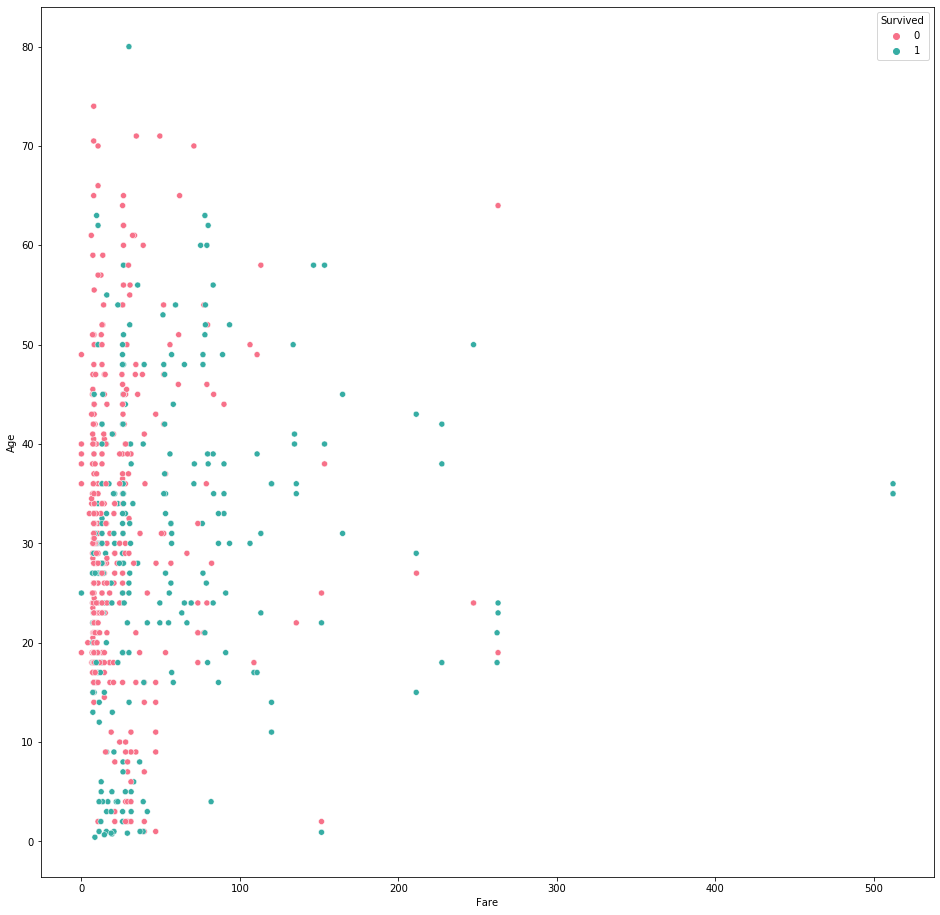

In [47]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='Fare', y='Age', hue='Survived', palette='husl')

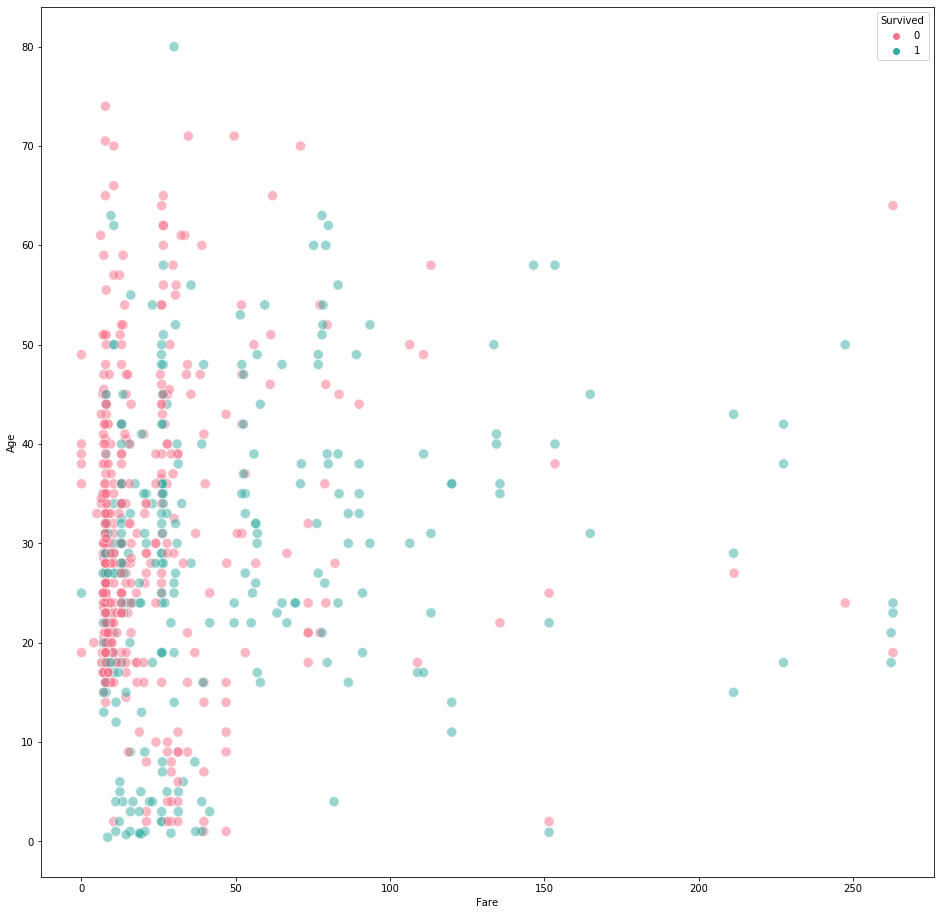

In [48]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=df[df['Fare']<400]['Fare'], y=df['Age'], hue=df['Survived'], s=100, alpha=0.5, palette='husl')

In [49]:
# fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4), constrained_layout=True)

# axs[0].scatter(df[df['Survived']==0]['Fare'], df[df['Survived']==0]['Age'], )
# axs[1].scatter(df[(df['Survived']==1) & (df['Fare']<300)]['Fare'], df[(df['Survived']==1) & (df['Fare']<300)]['Age'], )
# axs[0].set_title('Died')
# axs[1].set_title('Survived')
# # fig.suptitle('plt.subplots()')

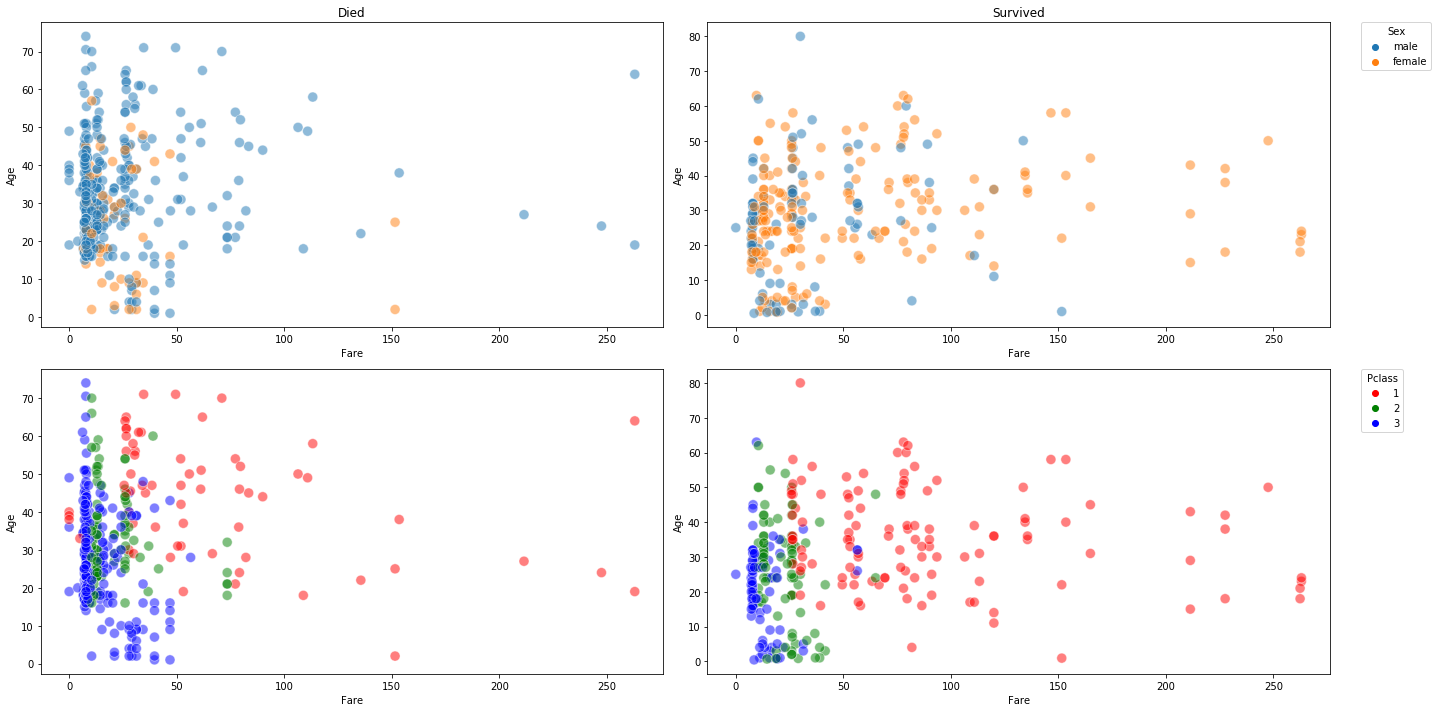

In [50]:
fig = plt.figure(figsize=(20,10))

#  subplot #1
plt.subplot(221)
plt.title('Died')
sns.scatterplot(x=df[df['Survived']==0]['Fare'], y=df[df['Survived']==0]['Age'],
                hue = df['Sex'],legend=False, s=100, alpha=0.5)

#  subplot #2
plt.subplot(222)
plt.title('Survived')
sns.scatterplot(x=df[(df['Survived']==1) & (df['Fare']<300)]['Fare'], y=df[(df['Survived']==1) & (df['Fare']<300)]['Age'],
                hue = df['Sex'], s=100, alpha=0.5,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Sex')


#  subplot #3
plt.subplot(223)
# plt.title('Died')
sns.scatterplot(x=df[df['Survived']==0]['Fare'], y=df[df['Survived']==0]['Age'],
                hue = df['Pclass'],legend=False, palette=['r','g','b'], s=100, alpha=0.5)

#  subplot #4
plt.subplot(224)
# plt.title('Survived')
sns.scatterplot(x=df[(df['Survived']==1) & (df['Fare']<300)]['Fare'], y=df[(df['Survived']==1) & (df['Fare']<300)]['Age'],
                hue = df['Pclass'], palette=['r','g','b'], s=100, alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Pclass')


plt.tight_layout()
plt.show()

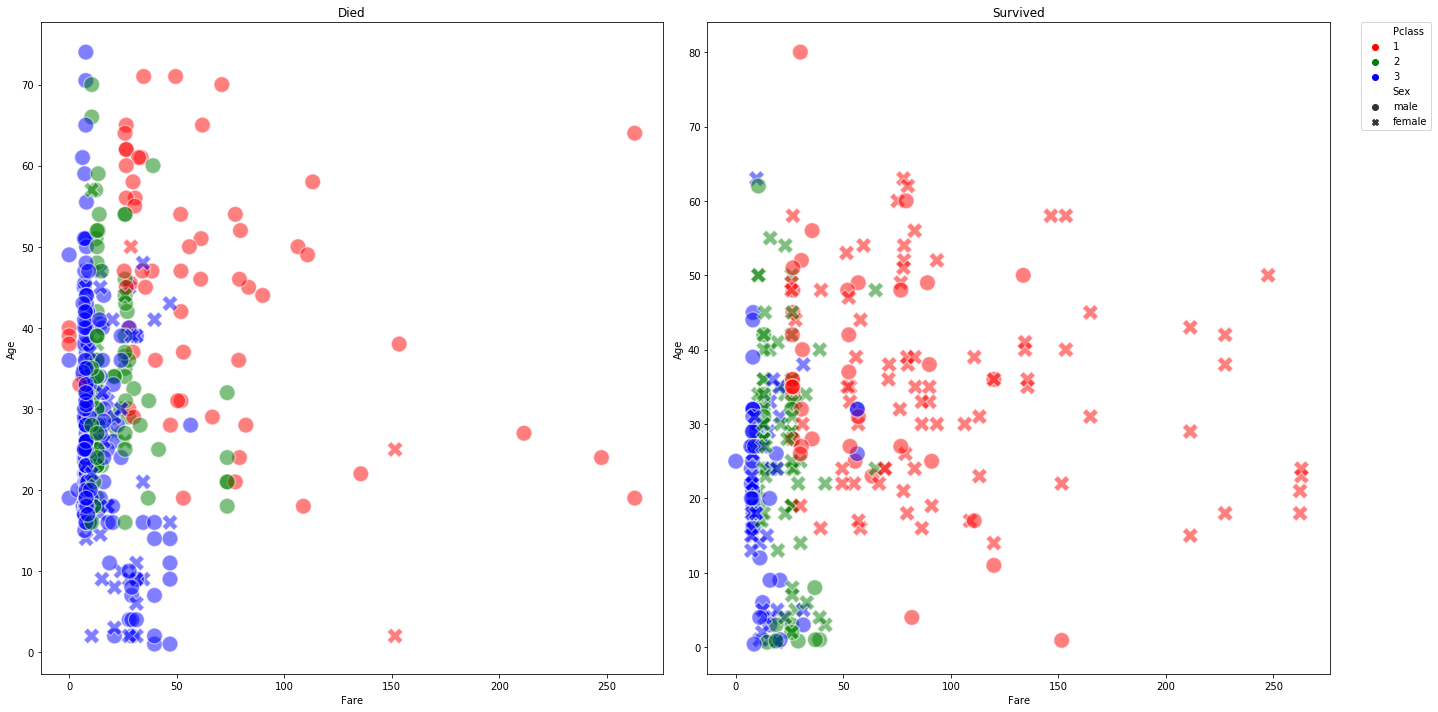

In [51]:
fig = plt.figure(figsize=(20,10))

#  subplot #1
plt.subplot(121)
plt.title('Died')
sns.scatterplot(x=df[df['Survived']==0]['Fare'], y=df[df['Survived']==0]['Age'],
                hue = df['Pclass'],legend=False, palette=['r','g','b'], s=250, alpha=0.5, style=df['Sex'])

#  subplot #2
plt.subplot(122)
plt.title('Survived')
sns.scatterplot(x=df[(df['Survived']==1) & (df['Fare']<300)]['Fare'], y=df[(df['Survived']==1) & (df['Fare']<300)]['Age'],
                hue = df['Pclass'], palette=['r','g','b'], s=250, alpha=0.5, style=df['Sex'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

plt.tight_layout()
plt.show()

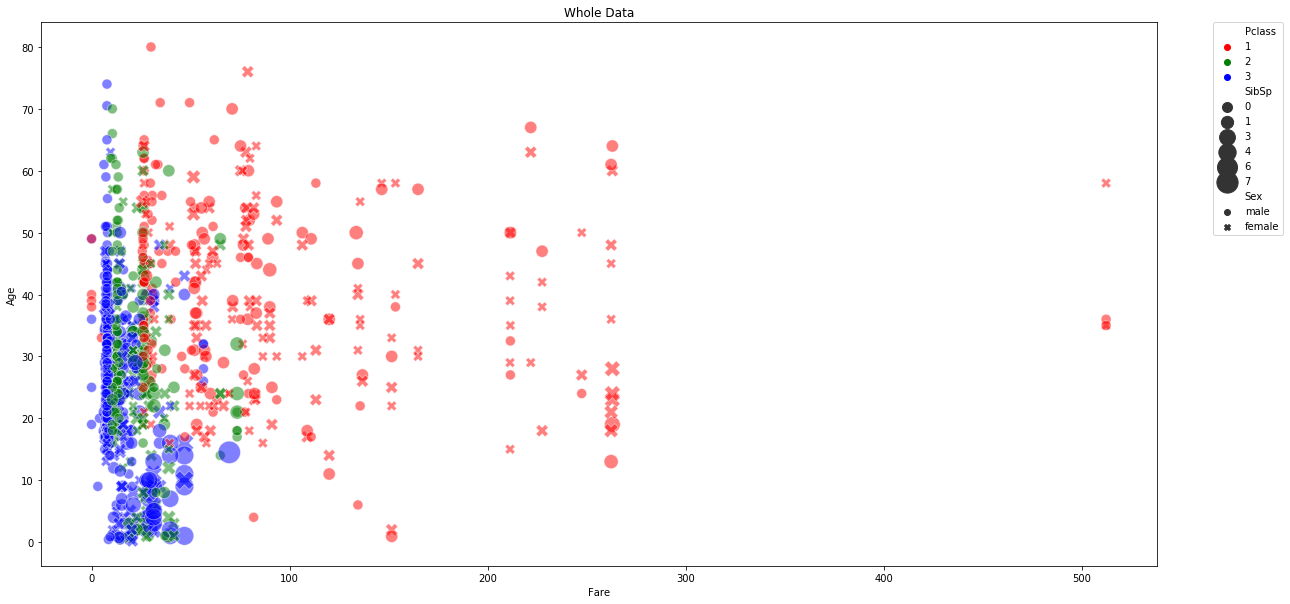

In [52]:
plt.figure(figsize=(20,10))
plt.title('Whole Data')

sns.scatterplot(data=dset, x='Fare', y='Age',
               hue='Pclass', palette=['r','g','b'], style='Sex', size='SibSp', sizes=(100,500),
               s=500, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

plt.show()

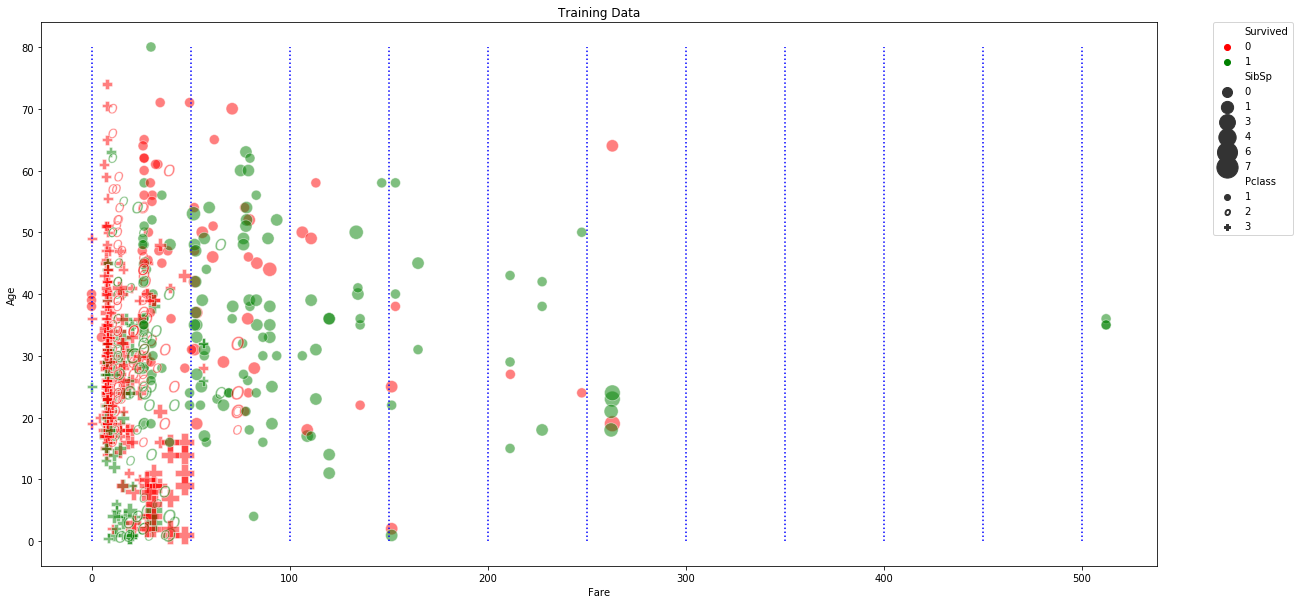

In [53]:
plt.figure(figsize=(20,10))
plt.title('Training Data')

sns.scatterplot(data=df[df['Fare']<600], x='Fare', y='Age',
               hue='Survived', palette=['r','g'], style='Pclass', markers=['o','$o$','P'],
               size='SibSp', sizes=(100,500),
               s=500, alpha=0.5)
for i in range(0,501,50):
    plt.plot([i,i], [0,80], ':', color='b')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

plt.show()

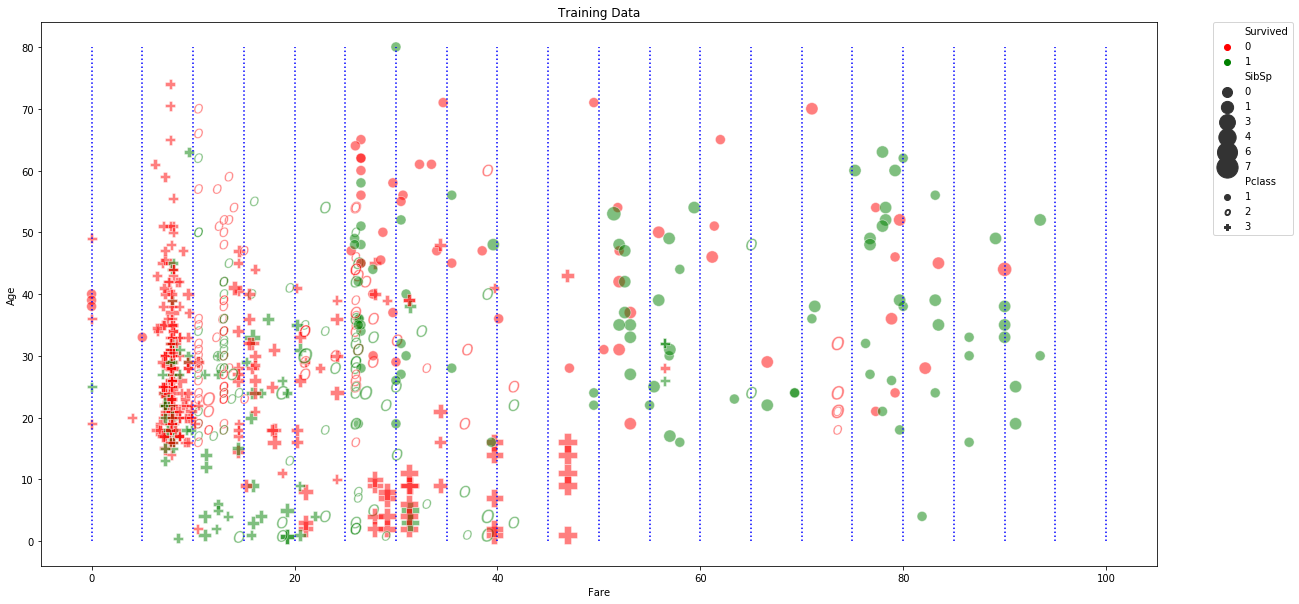

In [54]:
plt.figure(figsize=(20,10))
plt.title('Training Data')

sns.scatterplot(data=df[df['Fare']<100], x='Fare', y='Age',
               hue='Survived', palette=['r','g'], style='Pclass', markers=['o','$o$','P'],
               size='SibSp', sizes=(100,500),
               s=500, alpha=0.5)
for i in range(0,101,5):
    plt.plot([i,i], [0,80], ':', color='b')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

plt.show()

In [55]:
print('Mean (training data, test data, the whole data) =',(df['Fare'].mean(),test['Fare'].mean(), dset['Fare'].mean()))

Mean (training data, test data, the whole data) = (32.2042079685746, 35.6271884892086, 33.2954792813456)


#### Idea #12
To make better predictions, we will drop the exaggerated points where **Fare**>500 to imporve the model predictions. It is also a good idea to drop all the data where **Fare**>200 and see how the model will preform.

#### Idea #13
Creating a new feature called **Fare_Range** where it groups the fares in groups of range **50**.

#### Idea #14
We can group the **Fare**s into a new feature based on the title. But you should study this idea more before you do that.

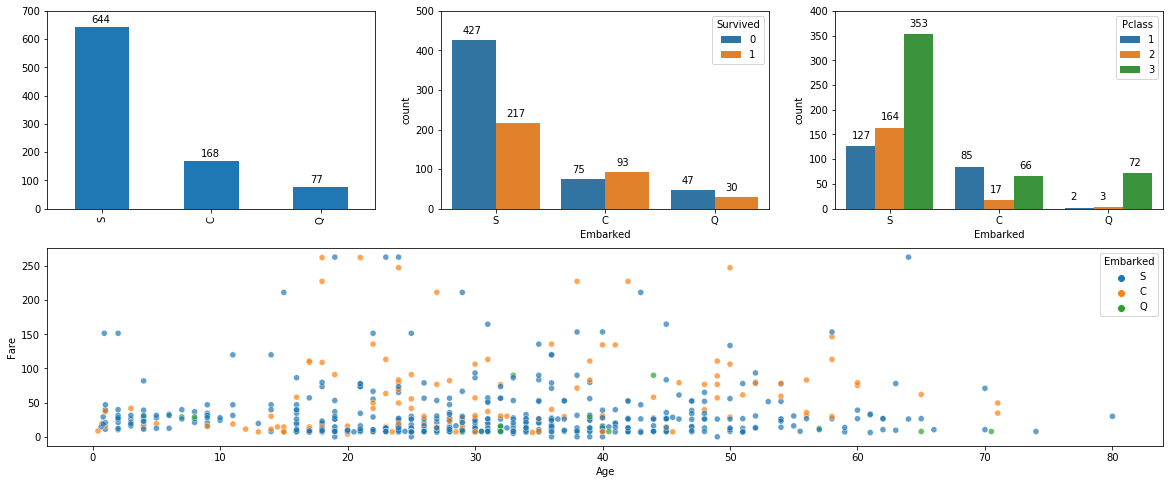

In [56]:
fig = plt.figure(figsize=(20,8))

#  subplot #1
plt.subplot(231)
ax0 = df['Embarked'].value_counts().plot(kind='bar',)
for p in ax0.patches:
        ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+15))
plt.ylim(0, 700)

plt.subplot(232)
ax1 = sns.countplot(data=df, x='Embarked', hue='Survived', )
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+15))
plt.ylim(0, 500)

plt.subplot(233)
ax2 = sns.countplot(data=df, x='Embarked', hue='Pclass',)
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+15))
plt.ylim(0, 400)

plt.subplot(212)
sns.scatterplot(data=df[df['Fare']<300], x='Age', y='Fare', hue='Embarked',alpha=0.7)

plt.show()

#### Idea #15
It looks like most passengers have **Embarked** S, and those who have **Embarked** C tend to survive more. Also, for S and Q most passengers were on the third class, where for C there most passengers where on the first class.

We can conclude the following form the graphs above:
<ol>
    <li>Passnegers with higher fares tend to survive more.</li>
    <li>Younger passengers tend to survive more.</li>
    <li>Female passengers tend to survive more.</li>
    <li>Passengers who were traveling with a spouse, a parent, a sibling, a childe tend to survive more than those who were traveling alone.</li>
    <li>There are not enough data point for passengers who were traveling with two other people or more, thus we can't form any conlusion about them.</li>
</ol>

To work with the **Cabin** feature, we should start imputing the data and feature engineering it. This will allow us to get more points which might be helpfull in the analysis. But before we are able to do so, we need to work with the other features first.

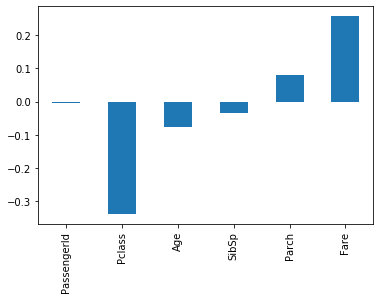

In [57]:
df.corr()['Survived'].drop('Survived').plot(kind='bar')

From the graph above we can see that the most related feature to the survival rate is the **Pclass** then **Fare**. However, we are hoping that these correlations will change after we start the engineering process of the features.

In [58]:
ideas = {'Idea #1': 'In general, the data peaked around age 25-30 years old. There is also a small peak around age 5. Later, we will revisit the ages groups based on the title and the family.',
         'Idea #2': 'We can see that younger people, from both genders, tend to survive more, and most death cases were between men. In addition to men spanning over all age groups.',
         'Idea #3': 'From the graph above we can see that passengers are mainly between 20 and 40 years old, and the younger they are the more they tend to survive.',
         'Idea #4': 'Based on the graphs above we conclud the existance of a huge correlation between the gender of the passengers and their survival. Also, the number of male passengers is higher in the train and test dataframes. Also, there are more males than females onboard, which supports Idea #2.',
         'Idea #5': 'Apperently, the passenger class played an important role in survival rate, that is, the height the class the more the passanger has a chance to survive.',
         'Idea #6': 'The fares that are higher than 300 could cause an issue when feeding the data into the model, thus, we shall drop all the points with Fare>300. Note: we can change this condition to exclude any fare above 160 and see if we get better results.',
         'Idea #7': 'Age>70 is a little bit exaggerated, so we can drop it and see what will happen.',
         'Idea #8': "It looks like most passengers were either traveling alone or with once spouse/sibling. Also, people whom where travelling with one person are more likely to survive. On the other hand, it will be hard to form any assumption about those who were travelling with more than one person as there are not enough data point to form one. \n Based on that, we can create a new feature and call it Alone where we will group the passengeres who are traveling with someone under the same the group and those who are travelling alone will be under another group. But first, let's see what kind of information is in the feature Parch",
         'Idea #9': "Based on the graph above we can form a similar conclusion as in Idea #8, and thus we can create a new feature called Family to count the number of people each passenger is travelling with. Note also that we will create the new features Family and Alone after we merge both Parch and SibSp by adding them.",
         'Idea #10': "Although it is hard to form a conclusion, we can see that there is a correlation between people who have the same ticket; some were travelling in the same cabine, others had the same last name. The only thing we can use the ticket for is to fill in the Cabine missing data, were we assume people who have the same ticket are in the same cabine. Thus, we will match the cabine or give a name for a missing cabine if none of the passengers who share the ticket have it named.",
         'Idea #11': "We can see here that we can use the Fare to impute the missing Ages by considering the new feature Title, the Pclass, the Fare, and the Cabine, that is, if the passnger has a young title and is travelling with two adults, we can assum they are family and thus consider a lower age than the mean age for that title.",
         'Idea #12': "To make better predictions, we will drop the exaggerated points where Fare>500 to imporve the model predictions. It is also a good idea to drop all the data where Fare>200 and see how the model will preform.",
         'Idea #13': "Creating a new feature called Fare_Range where it groups the fares in groups of range 50.",
         'Idea #14': "We can group the Fares into a new feature based on the title. But you should study this idea more before you do that.",
         'Idea #15': "It looks like most passengers have Embarked S, and those who have Embarked C tend to survive more. Also, for S and Q most passengers were on the third class, where for C there most passengers where on the first class."
        }

In [59]:
pd.set_option('display.max_colwidth', None)
idea = pd.DataFrame(data=ideas.values(), index=ideas.keys(), columns=['Ideas'])

# Feature Engineering

## Names and Titles

In this part of the code we are trying to engineer the **Name** feature so we can feed it to our model.

In [60]:
def Title_eng(train_data, test_data):
    # Combine both dataframes in one dataframe.
    whole_data = train_data.append(test_data)
    
    # Extract the titles from the data.
    title = []
    for i in whole_data['Name']:
        title.append(i.split(',')[1].split('.')[0].strip())
    
    # Add a new feature to whole_data
    whole_data['Title'] = title
    
    # Create a list of most common titles.
    Titles = ['Mr', 'Miss', 'Mrs', 'Master']
    
    # Replace the less common titles in whole_data
    whole_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
    whole_data['Title'].replace(['Lady'], 'Mrs', inplace=True)
    whole_data['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
    whole_data['Title'][~whole_data.Title.isin(Titles)] = 'Others'
    
    # Split the data again
    train_data = whole_data[:len(train_data)]
    test_data = whole_data[len(train_data):]

    return train_data, test_data

In [61]:
df, test = Title_eng(df, test)

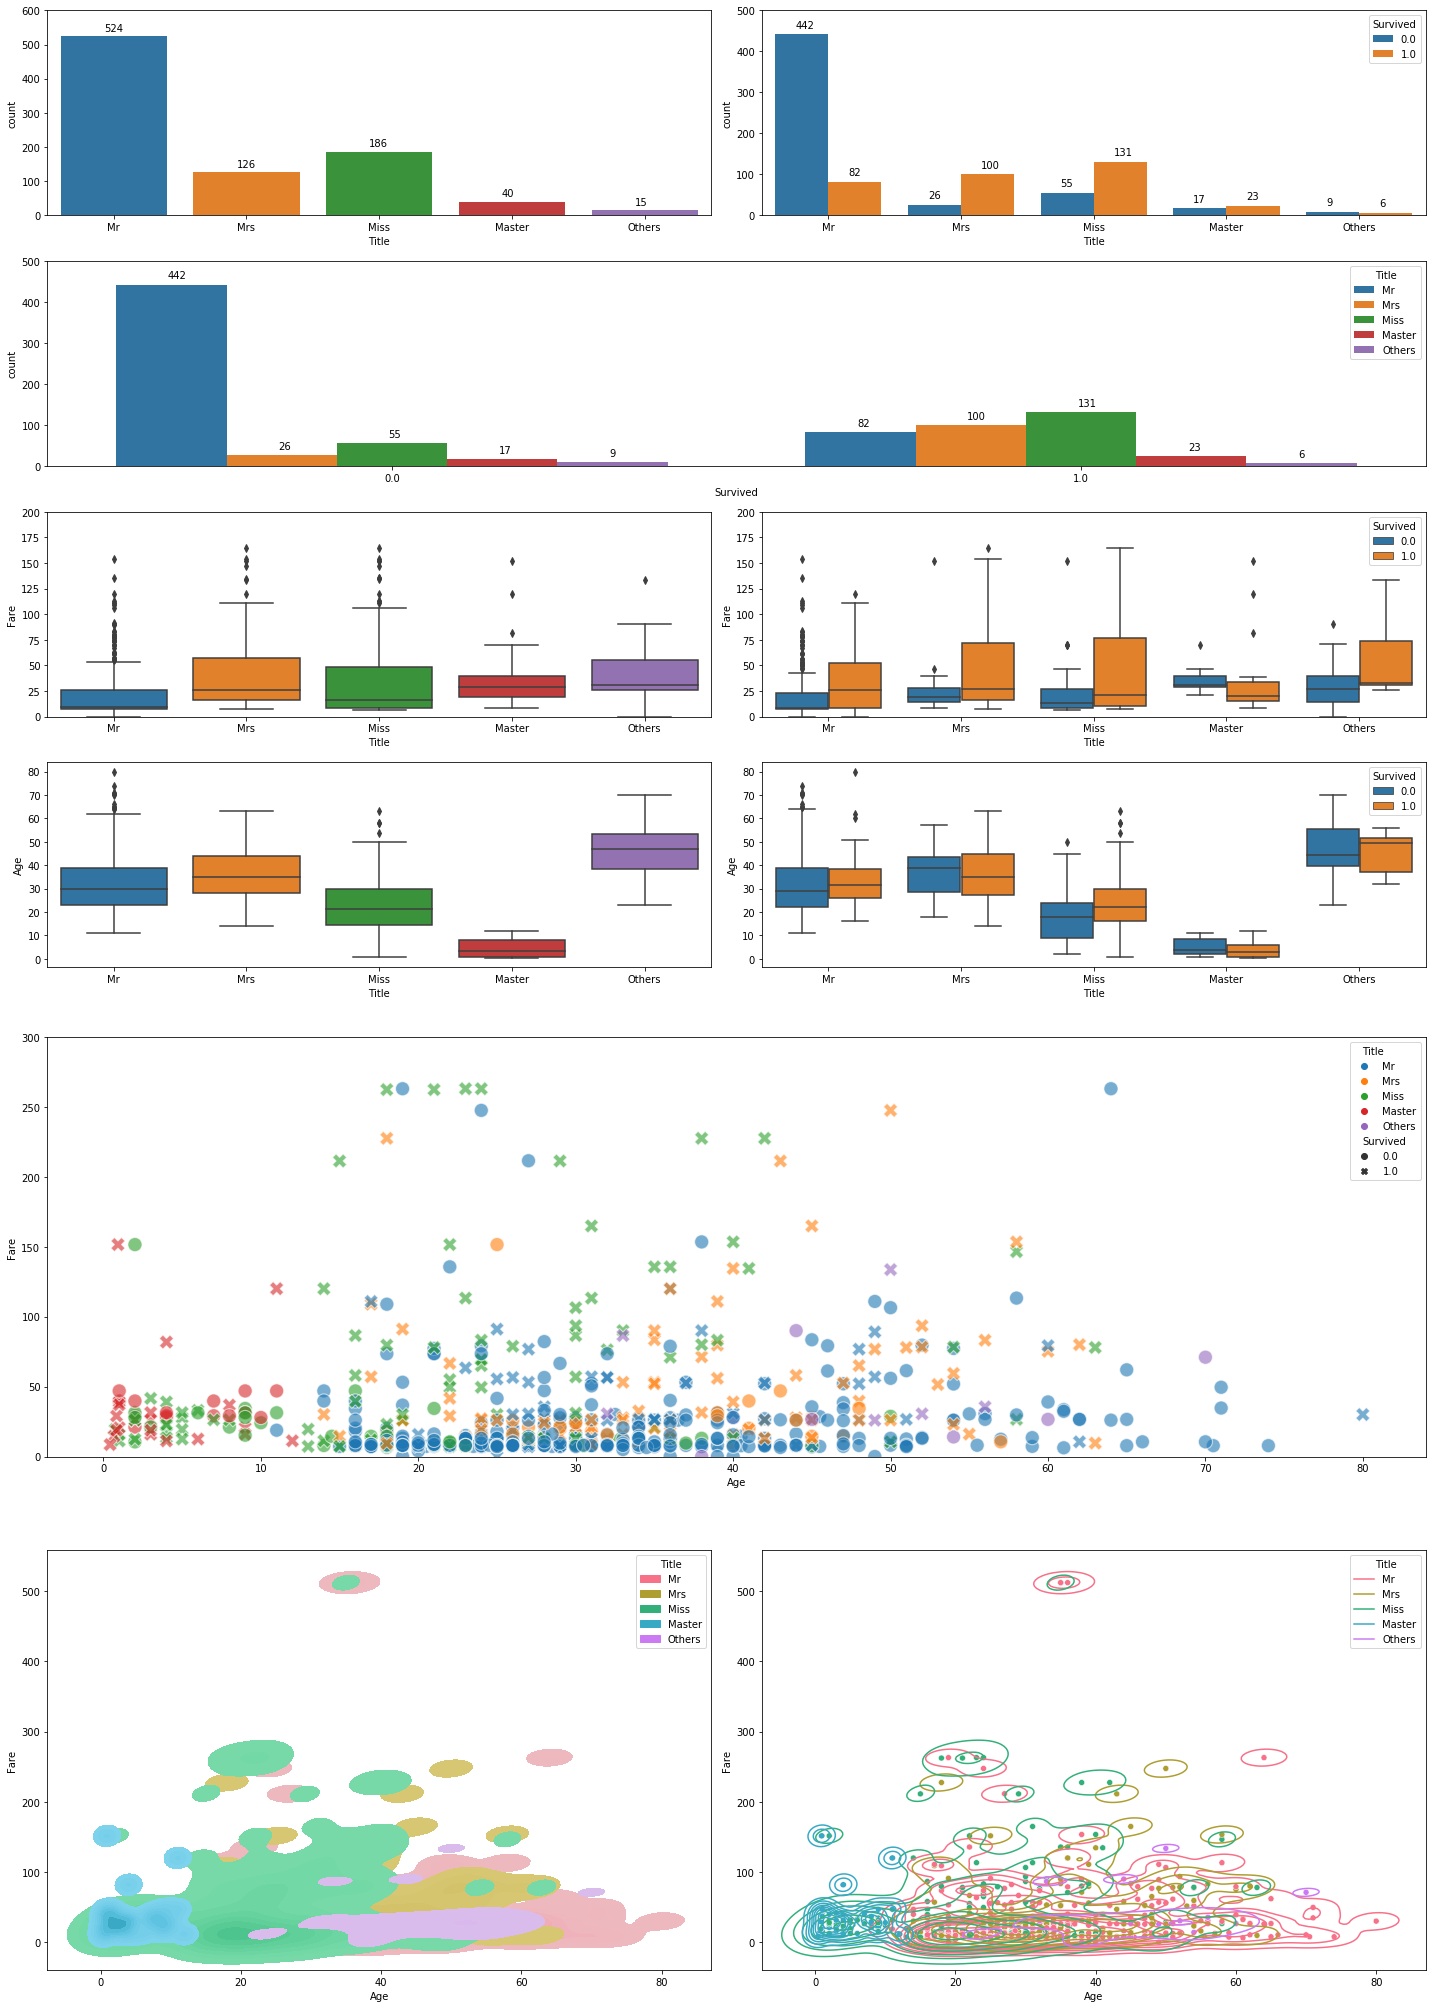

In [62]:
rows = 8
columns = 2
plt.figure(figsize=(20, 28))

plt.subplot(rows, columns, 1)
ax0 = sns.countplot(x=df['Title'],)
for p in ax0.patches:
        ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.325, p.get_height()+15))
plt.ylim(0, 600)

plt.subplot(rows, columns, 2)
ax0 = sns.countplot(x=df['Title'], hue=df['Survived'])
for p in ax0.patches:
        ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+15))
plt.ylim(0, 500)

plt.subplot(rows, 1, 2)
ax0 = sns.countplot(x=df['Survived'], hue=df['Title'])
for p in ax0.patches:
        ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.075, p.get_height()+15))
plt.ylim(0, 500)

plt.subplot(rows, columns, 5)
sns.boxplot(x=df['Title'],y=df['Fare'])
plt.ylim(0, 200)

plt.subplot(rows, columns, 6)
sns.boxplot(x=df['Title'],y=df['Fare'], hue=df['Survived'])
plt.ylim(0, 200)

plt.subplot(rows, columns, 7)
sns.boxplot(x=df['Title'],y=df['Age'])

plt.subplot(rows, columns, 8)
sns.boxplot(x=df['Title'],y=df['Age'], hue=df['Survived'])


plt.subplot(4, columns, 7)
sns.kdeplot(x=df.Age, y=df['Fare'], hue=df['Title'], palette='husl', shade=True, bw_adjust=.5,)

plt.subplot(4, columns, 8)
sns.scatterplot(x='Age', y='Fare', hue='Title', data=df, palette='husl')
sns.kdeplot(x=df.Age, y=df['Fare'], hue=df['Title'], bw_adjust=.5, palette='husl',)

plt.subplot(4, 1, 3)
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Title'], style=df['Survived'], s=200, alpha=0.6)
plt.ylim(0, 300)

plt.tight_layout()
plt.show()

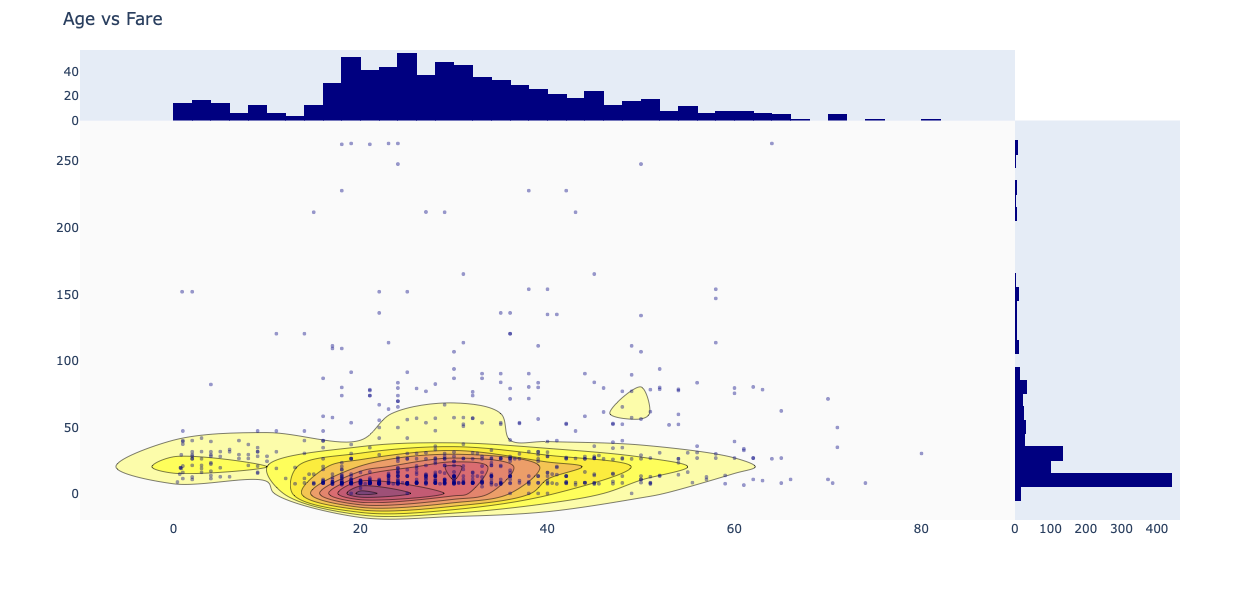

In [63]:
colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]

fig = ff.create_2d_density(
    x=df[df['Fare']<300]['Age'], y=df[df['Fare']<300]['Fare'], colorscale=colorscale, point_size=4, title='Age vs Fare' )
py.iplot(fig, )

In [64]:
dset=df.append(test, ignore_index=True)

# dset[dset.index.duplicated()]

# dset = dset[~dset.index.duplicated()]     # drop duplicated indices

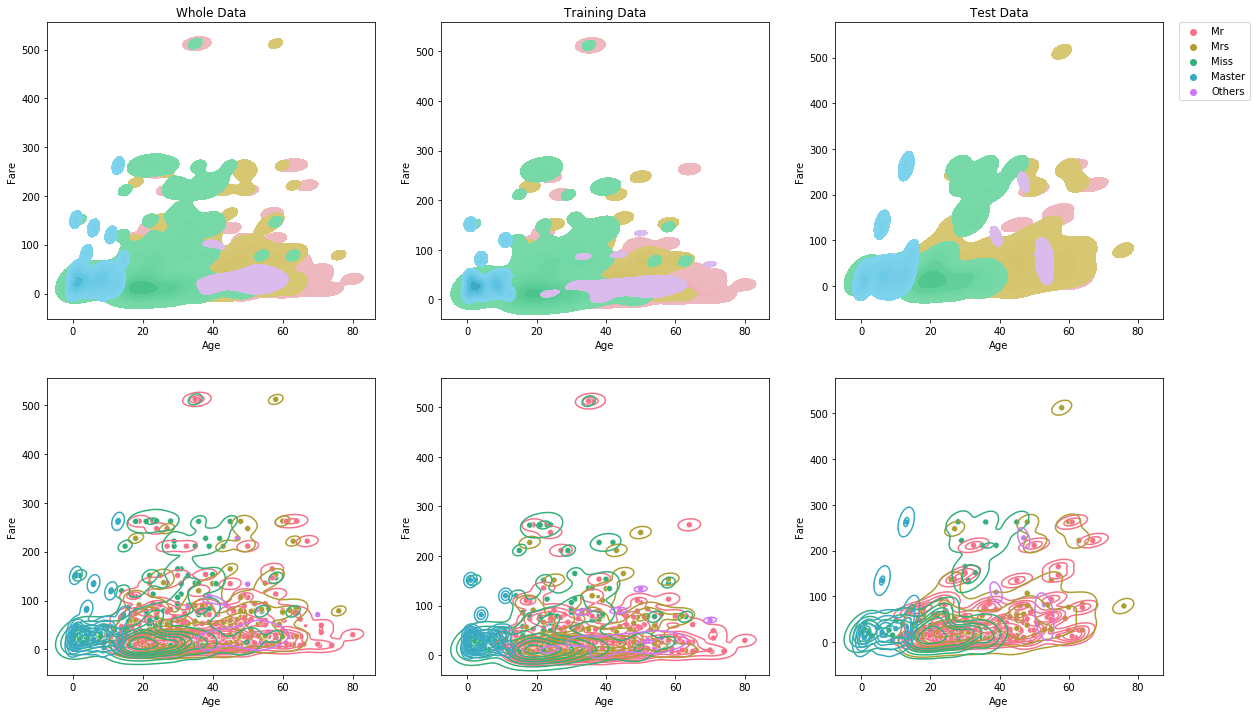

In [65]:
plt.figure(figsize=(20,12))
plt.subplot(231)
plt.title('Whole Data')
sns.kdeplot(data=dset, x='Age', y='Fare', hue='Title', palette='husl', shade=True, bw_adjust=.5,legend=False)
plt.subplot(232)
plt.title('Training Data')
sns.kdeplot(data=df, x='Age', y='Fare', hue='Title', palette='husl', shade=True, bw_adjust=.5,legend=False)
plt.subplot(233)
plt.title('Test Data')
sns.kdeplot(data=test, x='Age', y='Fare', hue='Title', palette='husl', shade=True, bw_adjust=.5, legend=False,)


plt.subplot(234)
sns.scatterplot(x='Age', y='Fare', hue='Title', data=dset, palette='husl', legend=False)
sns.kdeplot(data=dset, x='Age', y='Fare', hue='Title', palette='husl', shade=False, bw_adjust=.5,legend=False)
plt.subplot(235)
sns.scatterplot(x='Age', y='Fare', hue='Title', data=df, palette='husl', legend=False)
sns.kdeplot(data=df, x='Age', y='Fare', hue='Title', palette='husl', shade=False, bw_adjust=.5,legend=False)
plt.subplot(236)
sns.scatterplot(x='Age', y='Fare', hue='Title', data=test, palette='husl')
sns.kdeplot(data=test, x='Age', y='Fare', hue='Title', palette='husl', shade=False, bw_adjust=.5,)
plt.legend(bbox_to_anchor=(1.05, 2.2), loc=2, borderaxespad=0.,)



plt.show()

In [66]:
median_fares = {}
for i in dset['Title'].unique():
    median_fares[i] = dset[dset['Title']==i]['Fare'].median()
    
median_fares

{'Mr': 10.5, 'Mrs': 26.125, 'Miss': 15.2458, 'Master': 26.0, 'Others': 30.5}

In [67]:
median_ages = {}
for i in dset['Title'].unique():
    median_ages[i] = dset[dset['Title']==i]['Age'].median()
    
median_ages

{'Mr': 29.0, 'Mrs': 36.0, 'Miss': 22.0, 'Master': 4.0, 'Others': 48.0}

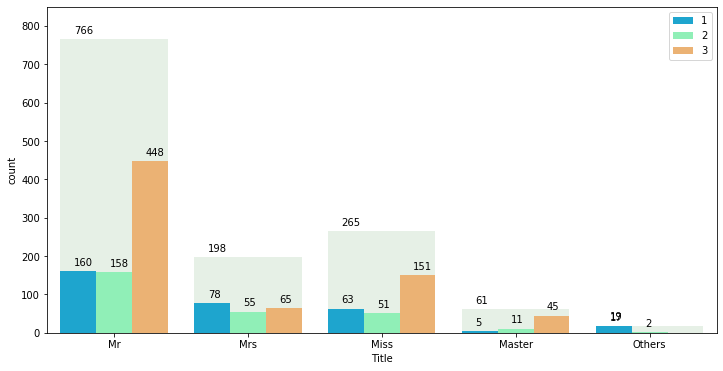

In [68]:
fig, ax = plt.subplots(figsize=(12,6))

ax0 = sns.countplot(data=dset, x='Title',alpha=0.1, palette=['g'], ax=ax)
ax0 = sns.countplot(data=dset, x='Title', hue='Pclass', palette='rainbow', ax=ax)
# ax0 = sns.countplot(data=df, x='Title', hue='Survived', palette='plasma',alpha=0.3, ax=ax)


plt.legend(loc='upper right')
for p in ax0.patches:
    ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+15))
plt.ylim(0, 850)
  
    
plt.show()

#### Idea #16
It looks like the title Mr and Other are more likely to die while the other three titles tend to survive more.

#### Idea #17
We will use the dictionary of the median ages to impute the missing data in the age column. And we will use the median_fares dictionary to impute the missing fares.

#### Idea #18
We can see that most 'Others' and 'Mrs' passengers were on the first class.

In [69]:
# fig, ax = plt.subplots(figsize=(12,6))

# sns.scatterplot(data=df[df['Fare']<200], x='Fare', y='Age', style='Survived', style_order={1:'x',0:'o'},
#                 hue='Title', s=150, alpha=0.7, ax=ax, palette='husl')
# sns.kdeplot(data=df[df['Fare']<200], x='Fare', y='Age', hue='Pclass', palette=['r', 'b', 'g'], alpha=0.2,
#             shade=True, bw_adjust=.5, ax=ax, legend=True, label='Pclass')
# plt.legend(bbox_to_anchor=(1.05,1.), loc=2)


# plt.show()

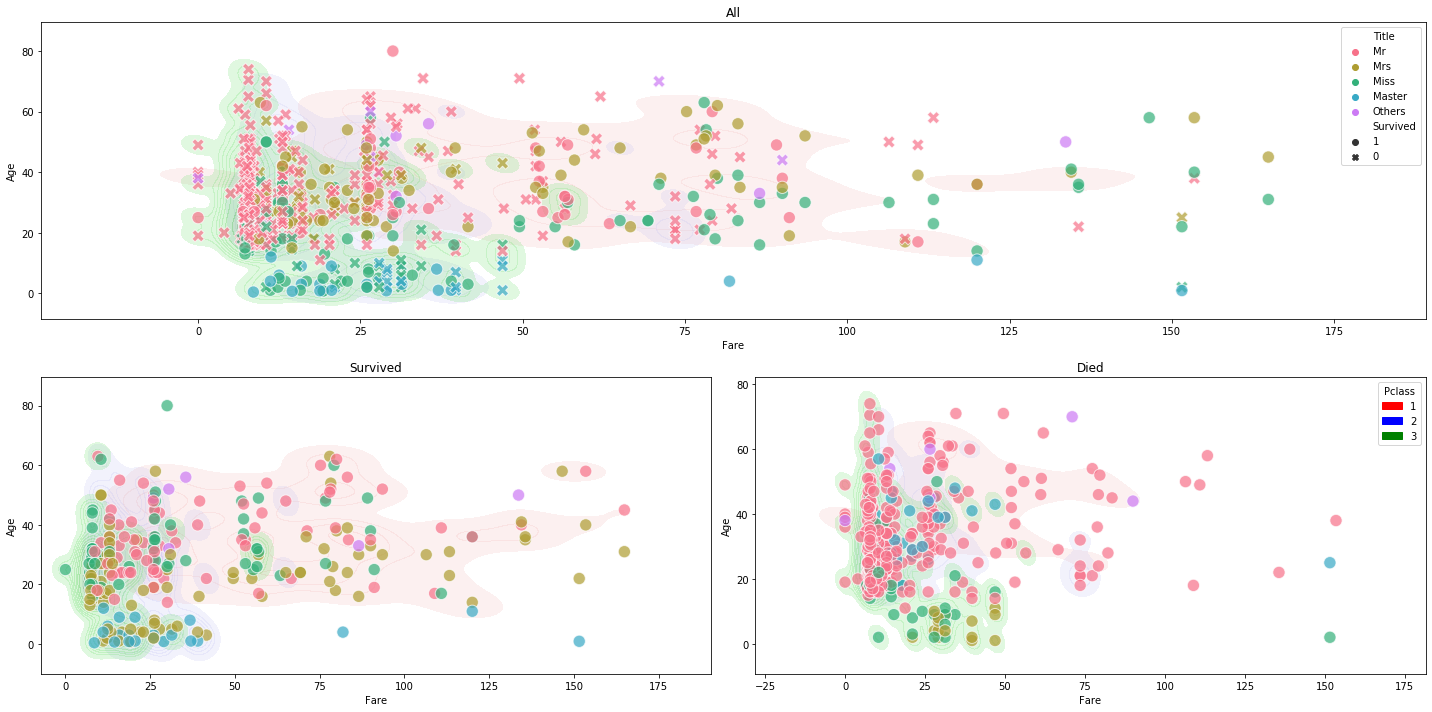

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(211)
plt.title('All')
sns.kdeplot(data=df[df['Fare']<200], x='Fare', y='Age', hue='Pclass', palette=['r', 'b', 'g'], alpha=0.2,
            shade=True, bw_adjust=.5, legend=True, label='Pclass')
sns.scatterplot(data=df[df['Fare']<200], x='Fare', y='Age', style='Survived', style_order={1:'x',0:'o'},
                hue='Title', s=150, alpha=0.7, palette='husl')
plt.legend(bbox_to_anchor=(1.0,1.), loc=1)


plt.subplot(223)
plt.title('Survived')
sns.kdeplot(data=df[(df['Fare']<200) & (df['Survived']==1)], x='Fare', y='Age', hue='Pclass', palette=['r', 'b', 'g'], alpha=0.2,
            shade=True, bw_adjust=.5, legend=False, label='Pclass')
sns.scatterplot(data=df[(df['Fare']<200) & (df['Survived']==1)], x='Fare', y='Age', style_order={1:'x',0:'o'}, legend=False,
                hue='Title', s=150, alpha=0.7, palette='husl')


plt.subplot(224)
plt.title('Died')
sns.kdeplot(data=df[(df['Fare']<200) & (df['Survived']==0)], x='Fare', y='Age', hue='Pclass', palette=['r', 'b', 'g'], alpha=0.2,
            shade=True, bw_adjust=.5, legend=True, label='Pclass')
sns.scatterplot(data=df[(df['Fare']<200) & (df['Survived']==0)], x='Fare', y='Age', style_order={1:'x',0:'o'},legend=False,
                hue='Title', s=150, alpha=0.7, palette='husl')
# plt.legend(bbox_to_anchor=(1.05,1.), loc=2)


plt.tight_layout()
plt.show()

In [71]:
print(bcolors.BOLD+bcolors.BLUE+'The percentage of survival based on the title:'+bcolors.ENDC)
print(df[(df['Survived']==1)]['Title'].value_counts(sort=True, normalize=True))
print(bcolors.BOLD+bcolors.PURPLE+'____________________________________________________'+bcolors.ENDC)
print(bcolors.BOLD+bcolors.RED+'The percentage of death based of the title:'+bcolors.ENDC)
print(df[(df['Survived']==0)]['Title'].value_counts(sort=True, normalize=True))

The percentage of survival based on the title:
Miss      0.383041
Mrs       0.292398
Mr        0.239766
Master    0.067251
Others    0.017544
Name: Title, dtype: float64
____________________________________________________
The percentage of death based of the title:
Mr        0.805100
Miss      0.100182
Mrs       0.047359
Master    0.030965
Others    0.016393
Name: Title, dtype: float64


In [72]:
# Replace Title with dummy indecies.
def Title_dummy(train_data, test_data):
    # Combine both dataframes in one dataframe.
#     whole_data = train_data.append(test_data)
    
#     # Get the dummy indices
#     titl = pd.get_dummies(whole_data['Title'], drop_first=True)
#     whole_data = pd.concat([whole_data,titl], axis=1)
#     whole_data.drop(['Name', 'Title'], axis=1, inplace=True)
    
#     # Split the data again
#     train_data = whole_data[:len(train_data)]
#     test_data = whole_data[len(train_data):]
    titles_dict = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Others':4}
    train_data['Title_Code'] = train_data.Title.map(titles_dict).astype('int')
    test_data['Title_Code'] = test_data.Title.map(titles_dict).astype('int')


    return train_data, test_data

In [73]:
df, test = Title_dummy(df, test)

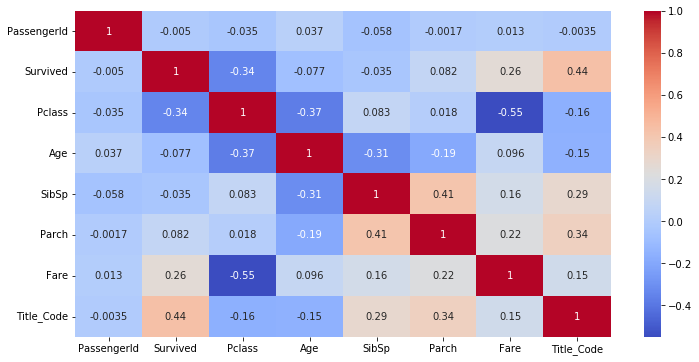

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Idea #19
We can see that there is a high correlation between the **Title**, the **Pclass**, the **Fare**, and the survival rate. Also, we can observe a strong correlation between **Title** and **SibSp**, and **Parch**, between **Pclass** and **Fare**, and **Age**.

In [75]:
idea.loc["Idea #16"]='It looks like the title Mr and Other are more likely to die while the other three titles tend to survive more.'
idea.loc['Idea #17']='We will use the dictionary of the median ages to impute the missing data in the age column. And we will use the median_fares dictionary to impute the missing fares.'
idea.loc['Idea #18']="We can see that most 'Others' and 'Mrs' passengers were on the first class"
idea.loc['Idea #19']="We can see that there is a high correlation between the Title, the Pclass, the Fare, and the survival rate. Also, we can observe a strong correlation between Title and SibSp, and Parch, between Pclass and Fare, and Age."

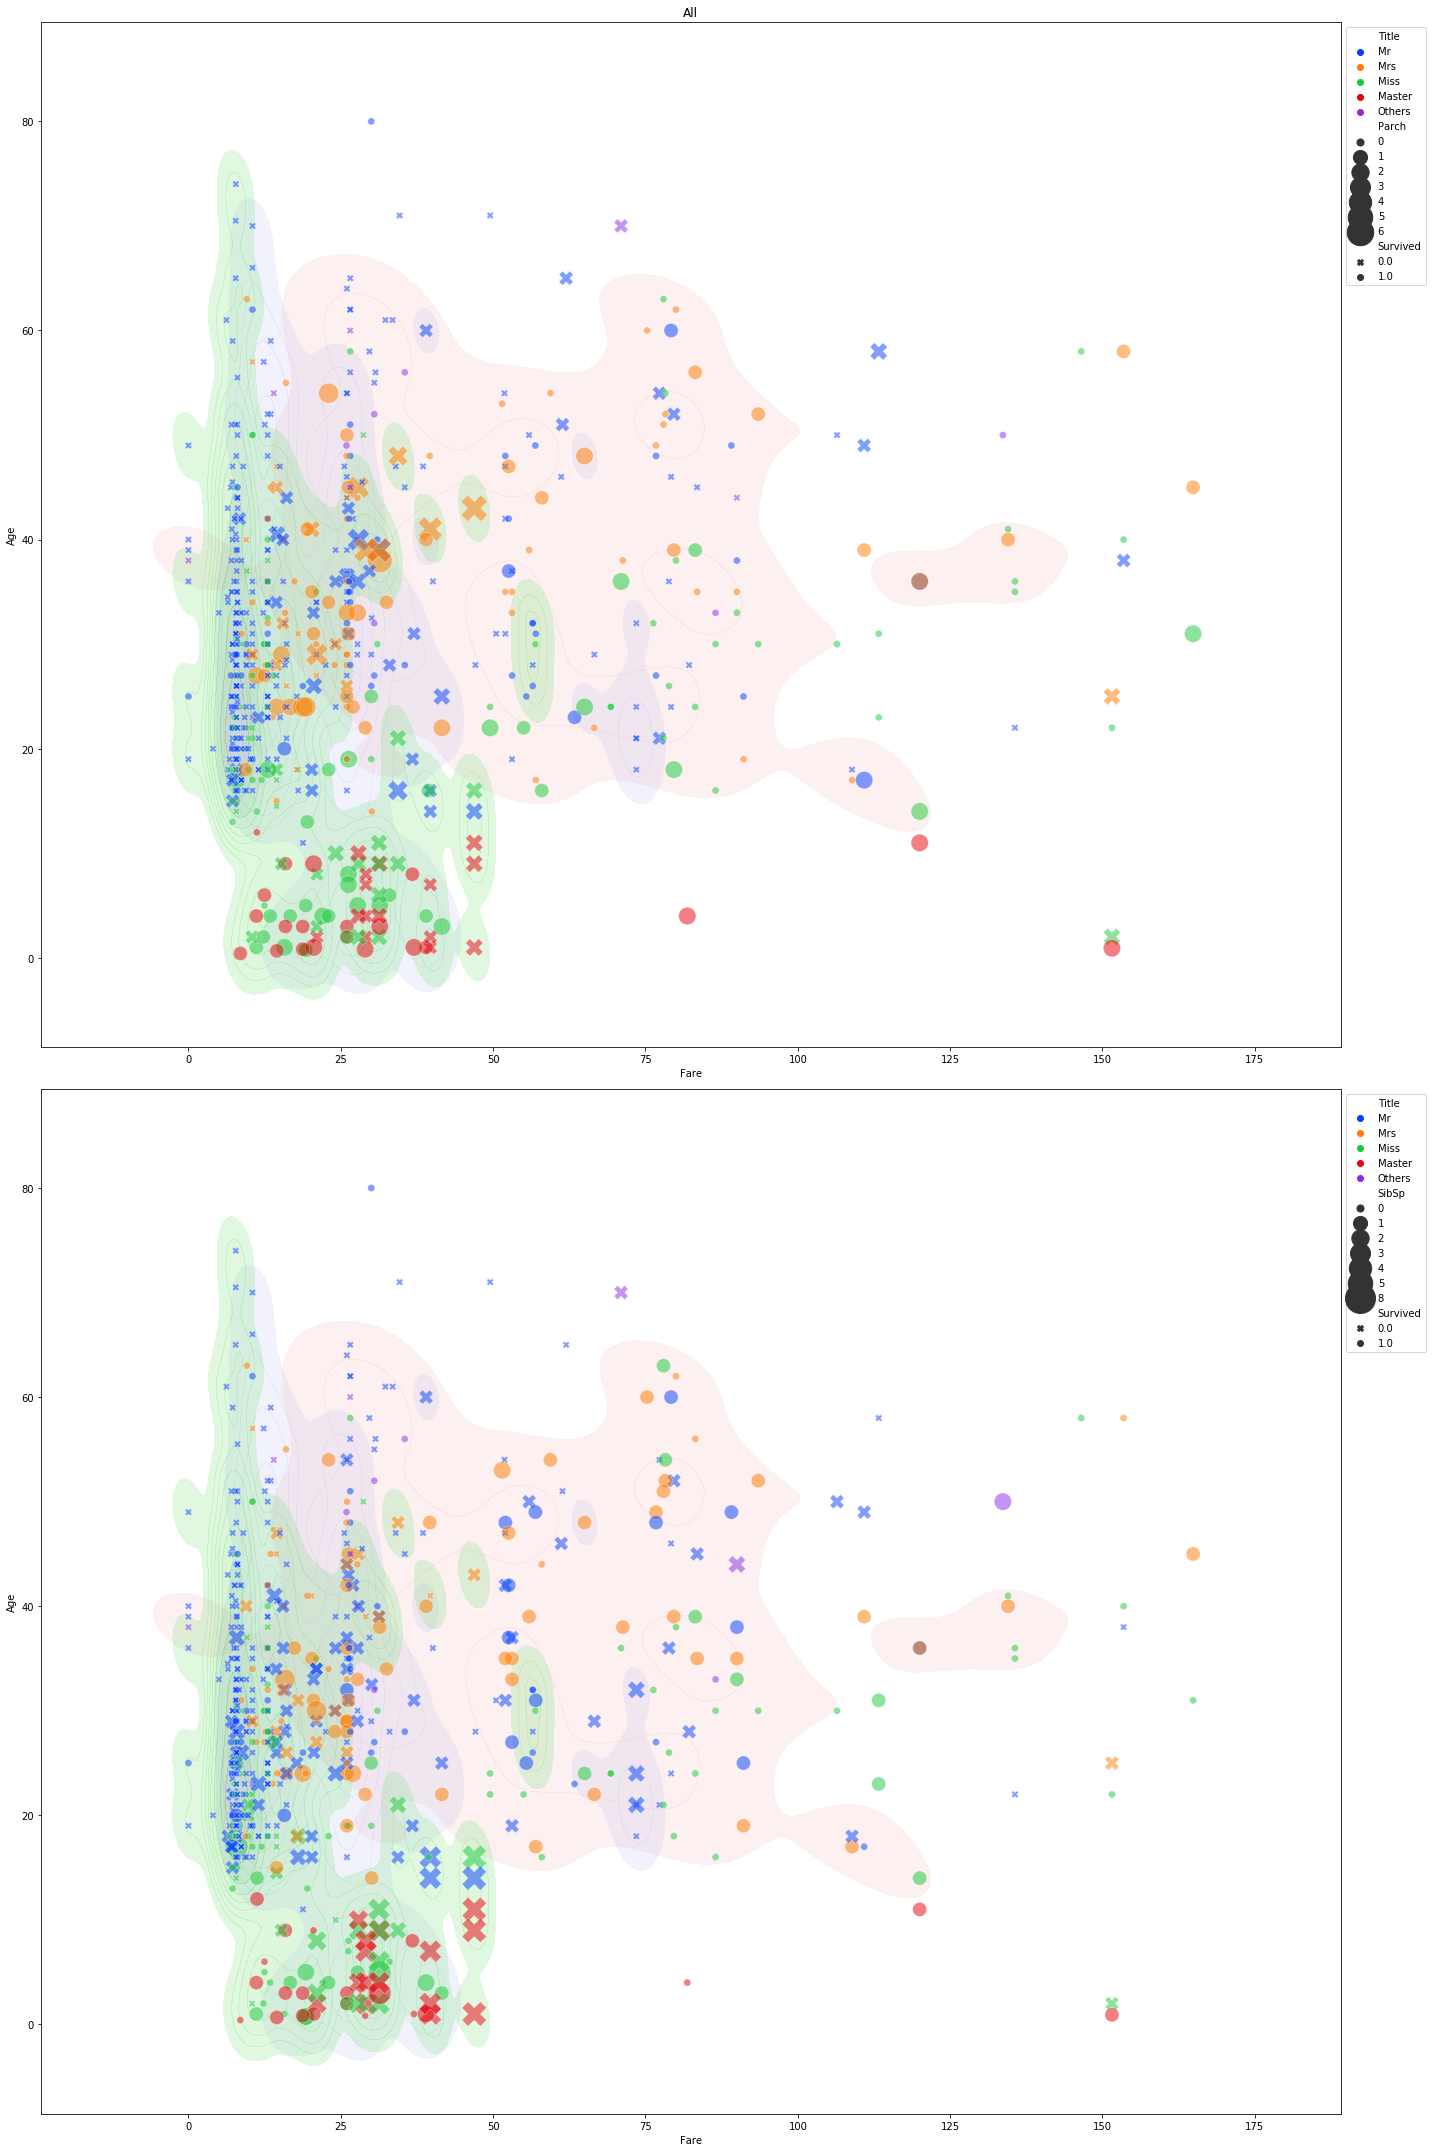

In [76]:
plt.figure(figsize=(20,30))
plt.subplot(211)
plt.title('All')
sns.kdeplot(data=df[df['Fare']<200], x='Fare', y='Age', hue='Pclass', palette=['r', 'b', 'g'], alpha=0.2,
            shade=True, bw_adjust=.5, legend=True, label='Pclass')
sns.scatterplot(data=df[df['Fare']<200], x='Fare', y='Age', style='Survived', markers={0:"X",1:'o'},
                hue='Title', size='Parch', sizes={0:50, 1:200, 2:300, 3:400, 4:500, 5:600, 6:700,}, alpha=0.5, palette='bright')
plt.legend(bbox_to_anchor=(1.0,1.), loc=2)

plt.subplot(212)
sns.kdeplot(data=df[df['Fare']<200], x='Fare', y='Age', hue='Pclass', palette=['r', 'b', 'g'], alpha=0.2,
            shade=True, bw_adjust=.5, legend=True, label='Pclass')
sns.scatterplot(data=df[df['Fare']<200], x='Fare', y='Age', style='Survived', markers={0:"X",1:'o'},
                hue='Title', size='SibSp', sizes={0:50, 1:200, 2:300, 3:400, 4:500, 5:600, 6:700, 7:800, 8:900}, alpha=0.5, palette='bright')
plt.legend(bbox_to_anchor=(1.0,1.), loc=2)
plt.tight_layout()
plt.show()

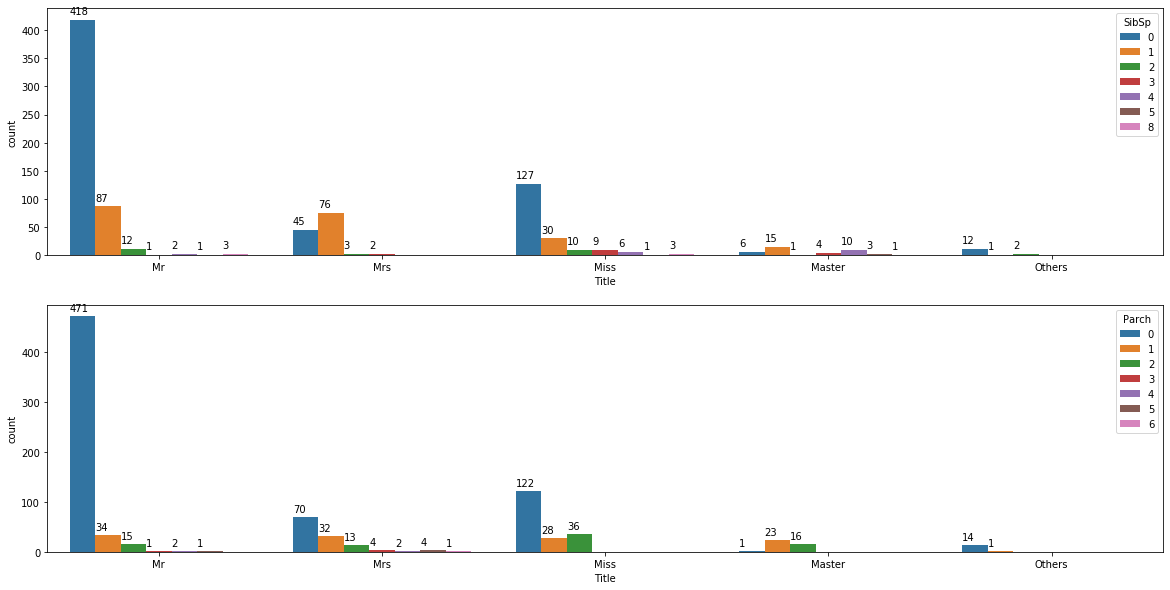

In [77]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
ax0 = sns.countplot(data=df, x='Title', hue='SibSp')
plt.legend(title='SibSp', loc='upper right')
for p in ax0.patches:
    ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10))



plt.subplot(212)
ax0 = sns.countplot(data=df, x='Title', hue='Parch')
plt.legend(title='Parch', loc='upper right')
for p in ax0.patches:
    ax0.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+10))
    

# plt.tight_layout()
plt.show()

## Sex

In this part of the code we are trying to replace the **Sex** feature, which has the type object, to a numeral feature which we can feed into our model later.

In [78]:
def Sex_eng(train_data, test_data):
    sex_dict = {'male':0, 'female':1}
    
    whole_data = train_data.append(test_data)
    whole_data['Sex_Code'] = whole_data.Sex.map(sex_dict).astype('int')
    
    train_data = whole_data[:len(train_data)]
    test_data = whole_data[len(train_data):]
    
# Another way of doing it:
#     sex = pd.get_dummies(data['Sex'], drop_first=True)
#     data = pd.concat([data, sex], axis=1)
#     data.drop('Sex', axis=1, inplace=True)
    return train_data, test_data

In [79]:
df, test = Sex_eng(df, test)

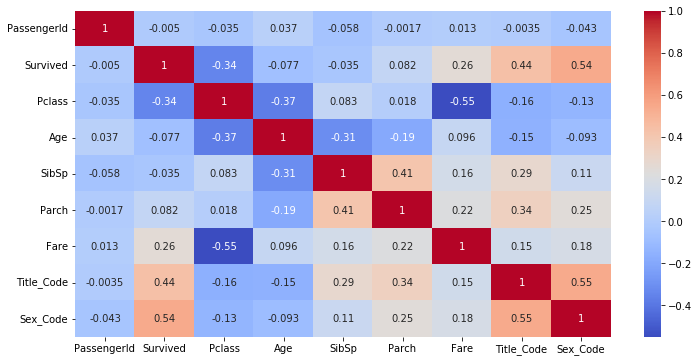

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Idea #20
We can observe high correlation between the gender and the survival rate as we expected before.

In [81]:
idea.loc['Idea #20']="We can observe high correlation between the gender and the survival rate as we expected before."

In [82]:
idea['Applied']=' '
idea['Applied']["Idea #1"] = 'Yes'
idea['Applied']["Idea #2"] = 'Yes'
idea['Applied']["Idea #4"] = 'Yes'
idea['Applied']["Idea #5"] = 'Yes'

## Age

In this part of the code we will fill in the missing age data. This is the most tricky part of the feature engineering, and it will be where you can do most of the manipulation to imporve the results of your model.

I will choose to fill it based on the **Title** and the median age of each title.

In [83]:
median_ages

{'Mr': 29.0, 'Mrs': 36.0, 'Miss': 22.0, 'Master': 4.0, 'Others': 48.0}

In [84]:
def Age_eng(train_data, test_data):

    d = [train_data, test_data]
    for data in d:
        for title in median_ages.keys():
            data['Age'][(data.Age.isnull()) & (data.Title==title)] = median_ages[title]
    
    return d[0], d[1]

In [85]:
df, test = Age_eng(df, test)

In [86]:
dset=df.append(test)

In [87]:
dset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Title_Code        0
Sex_Code          0
dtype: int64

In [88]:
def Age_grouping(train_data, test_data):
    train_data.drop(train_data[train_data['Age']>65].index, inplace=True)
    d = [train_data, test_data]
    label = LabelEncoder()
    for data in d:
        # Make age intervals
        data['Age_Bin'] = pd.qcut(data['Age'], 5)
        # Convert the age intervals to numbers to use them in a model
        data['Age_Label'] = label.fit_transform(data['Age_Bin'])
        
    return d[0], d[1]

In [89]:
df, test = Age_grouping(df, test)

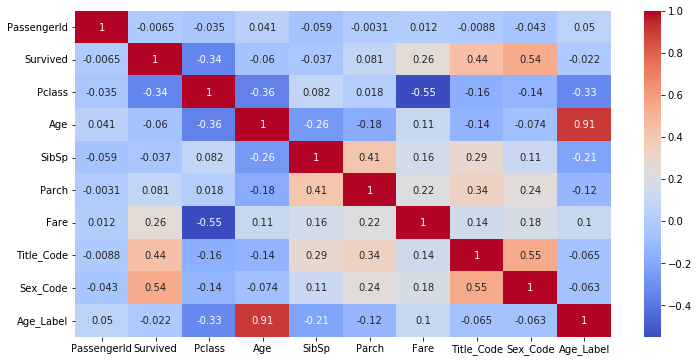

In [90]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

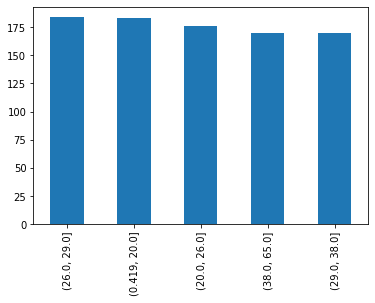

In [91]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df['Age_Bin'])

df['Age_Bin'].value_counts().plot(kind='bar')

We can see some improvment in the the correlation between the survival rate and the Ages once we have created the **Age_Label** feature.

In [92]:
idea['Applied']['Idea #7'] = 'Yes'
idea['Applied']['Idea #11'] = 'Yes'

## Embarked

Here we will get dummy indecies for the **Embarked** feature. Notice that it will fill the missing two points by defult as the two new added columns will have the value 0 for the missing data.

In [93]:
def Embarked_eng(train_data, test_data):
    train_data['Embarked'].fillna(value='U', inplace=True)
    embark = pd.get_dummies(train_data['Embarked'], drop_first=True)
    train_data = pd.concat([train_data, embark], axis=1)
    
    test_data['U'] = 0
    embark = pd.get_dummies(test_data['Embarked'], drop_first=True)
    test_data = pd.concat([test_data, embark], axis=1)
    
    return train_data, test_data

In [94]:
df, test = Embarked_eng(df, test)
dset = df.append(test)

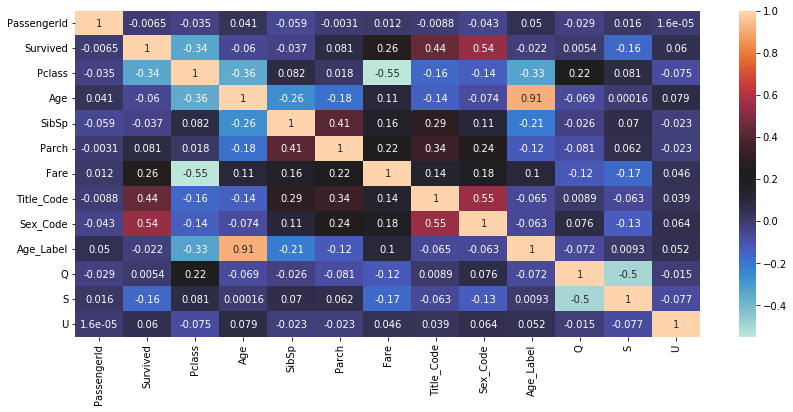

In [95]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

## Family

Here we will treat both features **SibSp** and **Parch** togther. We will marge them and use them to create a new feature **Family** that we will use instead of them.

In [96]:
def Family_eng(train_data, test_data):
    d = [train_data, test_data]
    
    for data in d:
        data['Family'] = data['SibSp']+data['Parch']+1    
        # Alone or with family
        data['Alone'] = data.Family.map(lambda x: 1 if x == 1 else 0)
    
    return d[0],d[1]

In [97]:
df, test = Family_eng(df, test)

In [98]:
def Family_grouping(train_data, test_data):
    whole_data = train_data.append(test_data)
    
    # Get the surname
    whole_data['Surname'] = whole_data.Name.str.extract(r'([A-Za-z]+),', expand=False)
    
    # Get the ticket id
    whole_data['Ticket_ID'] = whole_data.Ticket.str.extract(r'(.*\d)', expand=False)
    
    # Combine the surname and the ticket id
    whole_data['SurTick'] = whole_data['Surname'] + whole_data['Ticket_ID']
    
    # Create a new feature to tell if a group of people are family or not
    whole_data['HasFamily'] = whole_data.SurTick.duplicated(keep=False)*1
    
    train_data = whole_data[:len(train_data)]
    test_data = whole_data[len(train_data):]    
    
    return train_data, test_data

In [99]:
df, test = Family_grouping(df, test)

In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          682
Embarked         0
Title            0
Title_Code       0
Sex_Code         0
Age_Bin          0
Age_Label        0
Q                0
S                0
U                0
Family           0
Alone            0
Surname          0
Ticket_ID        4
SurTick          4
HasFamily        0
dtype: int64

In [101]:
df['HasFamily'].value_counts()

0    569
1    314
Name: HasFamily, dtype: int64

In [103]:
def Child(train_data, test_data):
    whole_data = train_data.append(test_data)
    
    # Create a new feature to define children
    whole_data['Child'] = whole_data.Age.map(lambda x: 1 if x <= 16 else 0)
    
    # Create a new feature to find out if a family has children onboard
    Fam_with_Child = whole_data[(whole_data.HasFamily==1) & (whole_data.Child==1)]['SurTick'].unique()
    
    # Encode families with children
    whole_data['FamilyId'] = 0
    
    x = 1
    for t in Fam_with_Child:
        whole_data.loc[whole_data.SurTick==t , ['FamilyId']] = x
        x += 1
    
    whole_data['ConnectedSurvival'] = 0.5
    
    Survived_by_FamilyId = whole_data.groupby('FamilyId').Survived.sum()
    
    for i in range(1, len(Fam_with_Child)+1):
        if Survived_by_FamilyId[i] >= 1:
            whole_data.loc[whole_data.FamilyId==i, ['ConnectedSurvival']] = 1
        elif Survived_by_FamilyId[i] == 0:
            whole_data.loc[whole_data.FamilyId==i, ['ConnectedSurvival']] = 0
        
    train_data = whole_data[:len(train_data)]
    test_data = whole_data[len(train_data):]    
    
    return train_data, test_data   

In [104]:
df, test = Child(df, test)

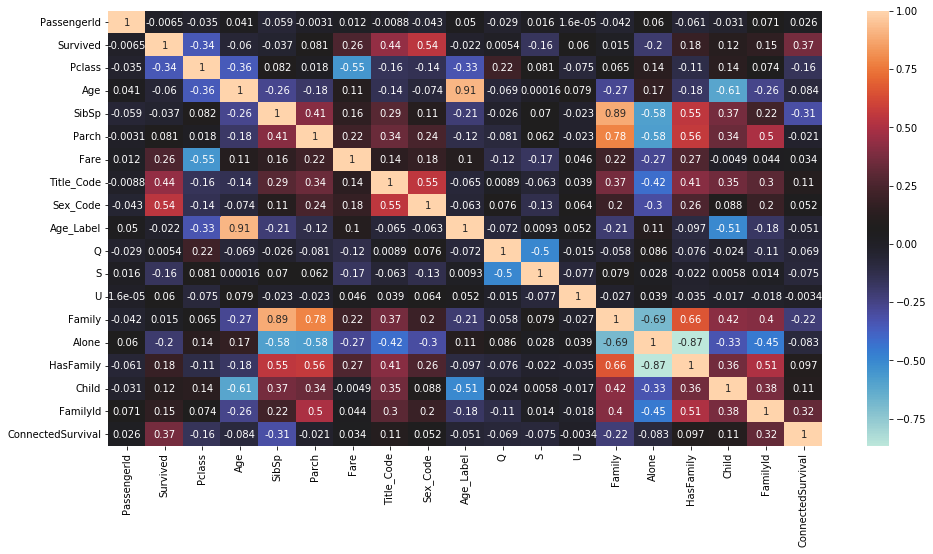

In [106]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

## Impute Fare

There is one fare missing from the test dataframe. It is poosible to replace the very high points with the median.

In [107]:
# Fill the missing points in the test dataframe
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Group fares
def Fare_grouping(train_data, test_data):
    d = [train_data, test_data]
    label = LabelEncoder()
    for data in d:
        # Make fare intervals
        data['Fare_Bin'] = pd.qcut(data['Fare'], 5)
        # Convert the fare intervals to numbers to use them in a model
        data['Fare_Bin'] = label.fit_transform(data['Fare_Bin'])
        
    return d[0], d[1]

In [108]:
df, test = Fare_grouping(df, test)

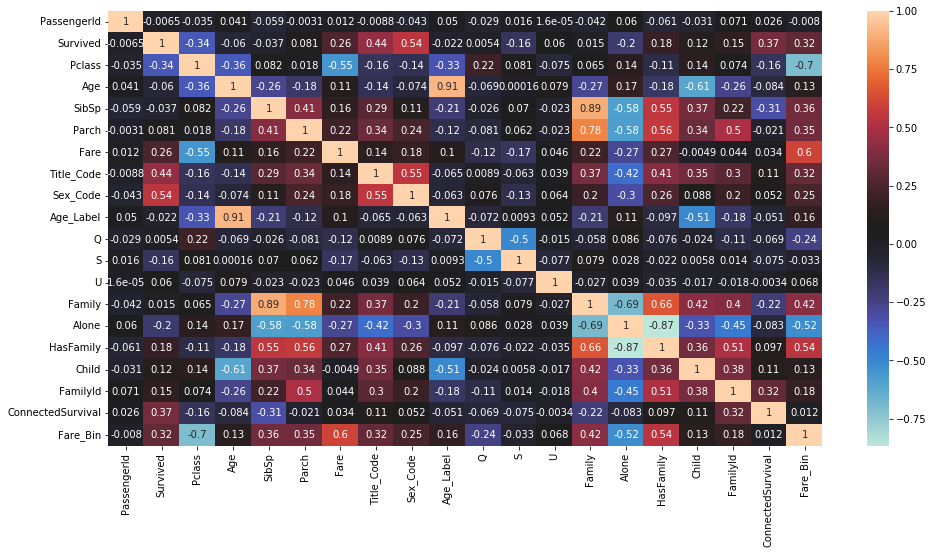

In [109]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

In [110]:
dset=df.append(test)

In [113]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 417
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        1301 non-null   int64  
 1   Survived           883 non-null    float64
 2   Pclass             1301 non-null   int64  
 3   Name               1301 non-null   object 
 4   Sex                1301 non-null   object 
 5   Age                1301 non-null   float64
 6   SibSp              1301 non-null   int64  
 7   Parch              1301 non-null   int64  
 8   Ticket             1301 non-null   object 
 9   Fare               1301 non-null   float64
 10  Cabin              292 non-null    object 
 11  Embarked           1301 non-null   object 
 12  Title              1301 non-null   object 
 13  Title_Code         1301 non-null   int32  
 14  Sex_Code           1301 non-null   int32  
 15  Age_Bin            1301 non-null   object 
 16  Age_Label          1301 n

In [ ]:
df['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Age_Bin', 'Surname', 'Ticket_ID', 'SurTick']

## Dropping Features

Now we can drop the features that we won't use in the model. As we stated before, we will drop the **Cabin** column.

In [114]:
def Drop_eng(data):
    data.drop(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
               'Cabin', 'Embarked', 'Title', 'Age_Bin', 'Surname', 'Ticket_ID', 'SurTick', 'HasFamily',
               'Child', 'FamilyId'], axis=1, inplace=True)
    
    return data

In [115]:
dset = Drop_eng(dset)
df = dset[:len(df)]
test = dset[len(df):]

**This bar chart will show how the features are correlated to each other which will help in the investigation.** Notice that, you will have to check it at the end of feature enigneering the data.

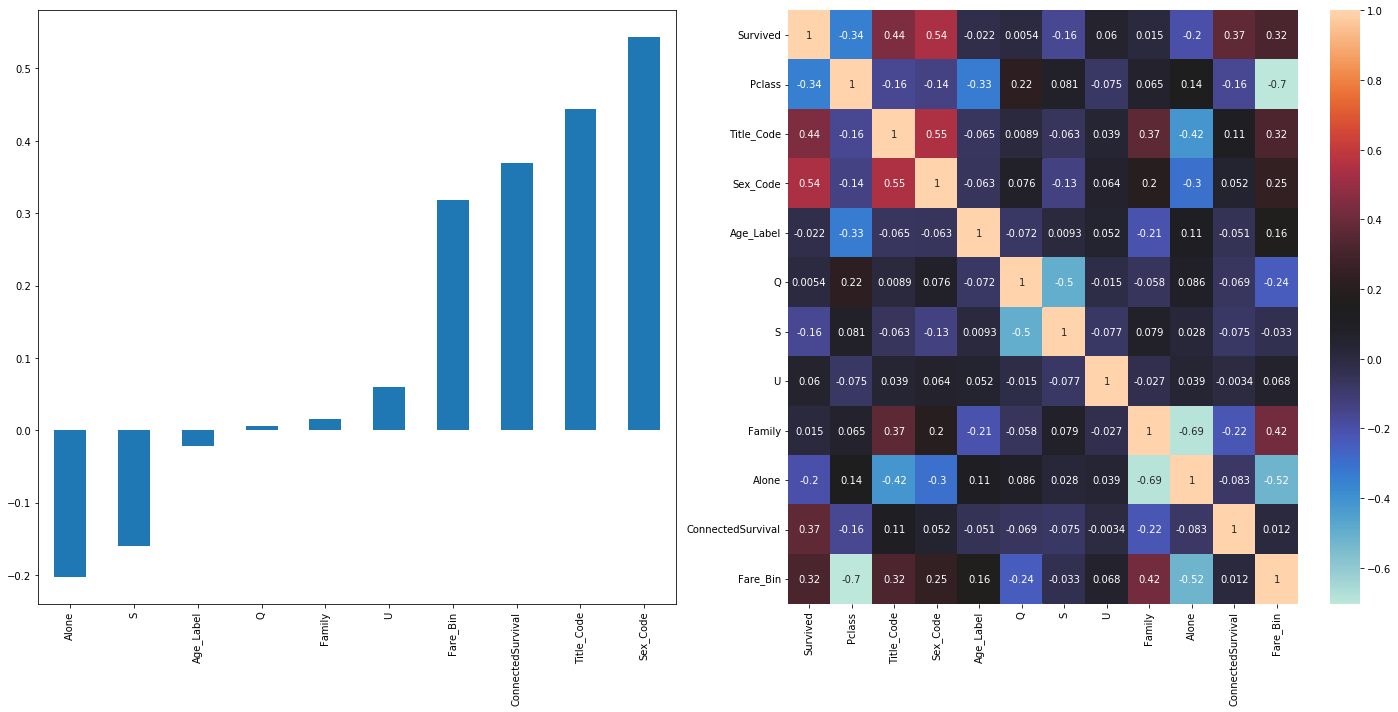

In [124]:
plt.figure(figsize=(20,10))
plt.subplot(121)
df.corr()['Survived'][2:].sort_values().plot(kind='bar')
plt.subplot(122)
sns.heatmap(df.corr(), annot=True, cmap='icefire', cbar=True)
plt.tight_layout()
plt.show()

In [126]:
target = df['Survived']
features = df.drop(['Survived'], axis=1)
        
# features = features.reindex(sorted(features.columns), axis=1)
# test = test.reindex(sorted(test.columns), axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.3, random_state=101)

In [127]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[147  15]
 [ 24  79]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       162
         1.0       0.84      0.77      0.80       103

    accuracy                           0.85       265
   macro avg       0.85      0.84      0.84       265
weighted avg       0.85      0.85      0.85       265



In [128]:
rfc = RandomForestClassifier(bootstrap=False, criterion='gini', min_samples_leaf=1,
                             min_samples_split=10, n_estimators=100)

rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[145  17]
 [ 25  78]]


              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       162
         1.0       0.82      0.76      0.79       103

    accuracy                           0.84       265
   macro avg       0.84      0.83      0.83       265
weighted avg       0.84      0.84      0.84       265



In [131]:
test.drop('Survived', axis=1, inplace=True)

In [132]:
pred_logreg = logreg.predict(test)
pred_rfc = rfc.predict(test)
arr = []
for i,j in zip(pred_rfc, pred_logreg):
    if  i==1 and j==1:
        arr.append(1)
    else:
        arr.append(0)
    
    
    
    # if (i == 1) and (j == 1):
    #     arr.append(1)
    # else:
    #     arr.append(0)
    # print(i,j,k)

In [133]:
submittion = pd.DataFrame(data=np.array(arr), columns=['Survived'],index=pd.read_csv('test.csv')['PassengerId'])
submittion.to_csv('submission.csv')